## Import Modules, Load Data and Data Review

In [18]:
#First, importing the neccesary libaries, such as numpy, pandas
import pandas as pd
import numpy as np

#Importing the plotting libraries, such as matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the scaling libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#Importing the evaluation libraries, such as mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Importing the train_test_split to split the data
from sklearn.model_selection import train_test_split

from scipy.stats import skew

#Importing the cross validation
from sklearn.model_selection import cross_validate

import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (14,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:.3f}'.format

In [92]:
#The test size
t = 0.2
#The random value
s = 101

In [2]:
#Reading the dataset from a csv file
df = pd.read_csv("final_scout_not_dummy.csv")

#Seeing the head of the data set
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [4]:
#Seeing the shape of the data set
df.shape
#As we can see, the shape of the data set is (15915, 23)

(15915, 23)

In [6]:
#Seeing the info of the data set
df.info()
#We can see that, there are about 15915 entries. 23 columns, float64(8), int64(2), object(13).
#There is no null data as well

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [8]:
#Seeing the description of the dataset
df.describe().T
#We can see that the mean anst std for age, Inspection_new, and Previous_Owners are nearly close to each other

,count,mean,std,min,25%,50%,75%,max
price,15915.000,18024.381,7381.679,4950.000,12850.000,16900.000,21900.000,74600.000
km,15915.000,32089.996,36977.215,0.000,1920.500,20413.000,46900.000,317000.000
Gears,15915.000,5.937,0.705,5.000,5.000,6.000,6.000,8.000
age,15915.000,1.390,1.121,0.000,0.000,1.000,2.000,3.000
Previous_Owners,15915.000,1.043,0.339,0.000,1.000,1.000,1.000,4.000
hp_kW,15915.000,88.499,26.674,40.000,66.000,85.000,103.000,294.000
Inspection_new,15915.000,0.247,0.431,0.000,0.000,0.000,0.000,1.000
Displacement_cc,15915.000,1428.662,275.804,890.000,1229.000,1461.000,1598.000,2967.000
Weight_kg,15915.000,1337.701,199.682,840.000,1165.000,1295.000,1472.000,2471.000
cons_comb,15915.000,4.832,0.868,3.000,4.100,4.800,5.400,9.100


In [9]:
#Checking the duplicated values
df.duplicated().sum()
#As we can see, there are about 1673 duplicated values

1673

In [10]:
#Dropping the duplicated values
df.drop_duplicates(inplace=True)

In [11]:
#Checking the duplicated values after dropping
df.duplicated().sum()
#As we can see, now we have 0 duplicated values

0

In [12]:
#Checking the null values in the data set
df.isnull().sum()
#As we can see, we do not have null values

make_model             0
body_type              0
price                  0
vat                    0
km                     0
Type                   0
Fuel                   0
Gears                  0
Comfort_Convenience    0
Entertainment_Media    0
Extras                 0
Safety_Security        0
age                    0
Previous_Owners        0
hp_kW                  0
Inspection_new         0
Paint_Type             0
Upholstery_type        0
Gearing_Type           0
Displacement_cc        0
Weight_kg              0
Drive_chain            0
cons_comb              0
dtype: int64

In [13]:
#Seeing the columns of the data set
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

## EDA

### make_model

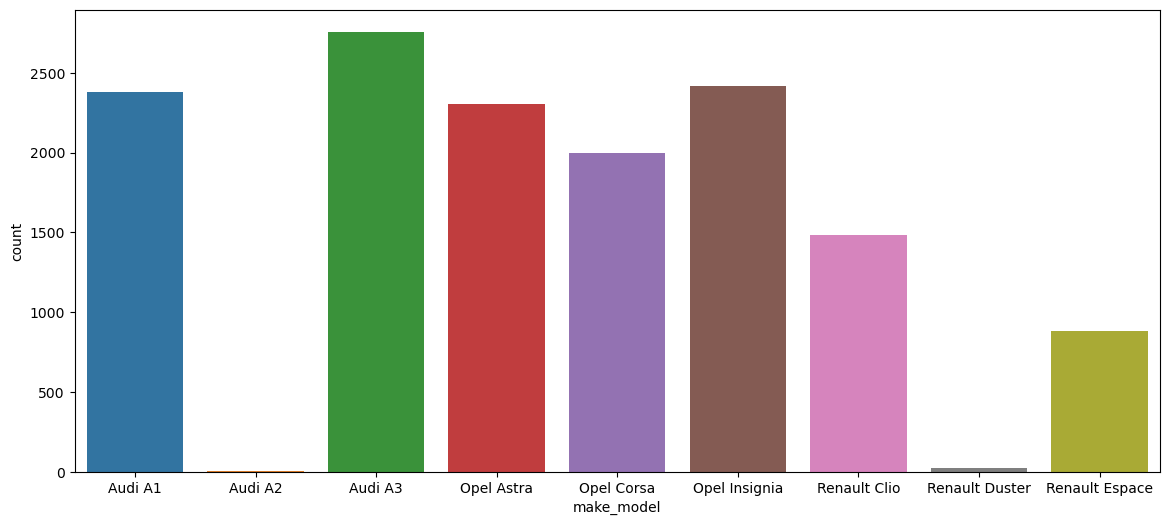

In [19]:
#Seeing the countplot of make_model
sns.countplot(x=df["make_model"])
plt.show()
#As we can see from the graph, we have 9 classes, for Audi A3 and Renault Duster, they are not high at all, and there values
#are so small compared to the others

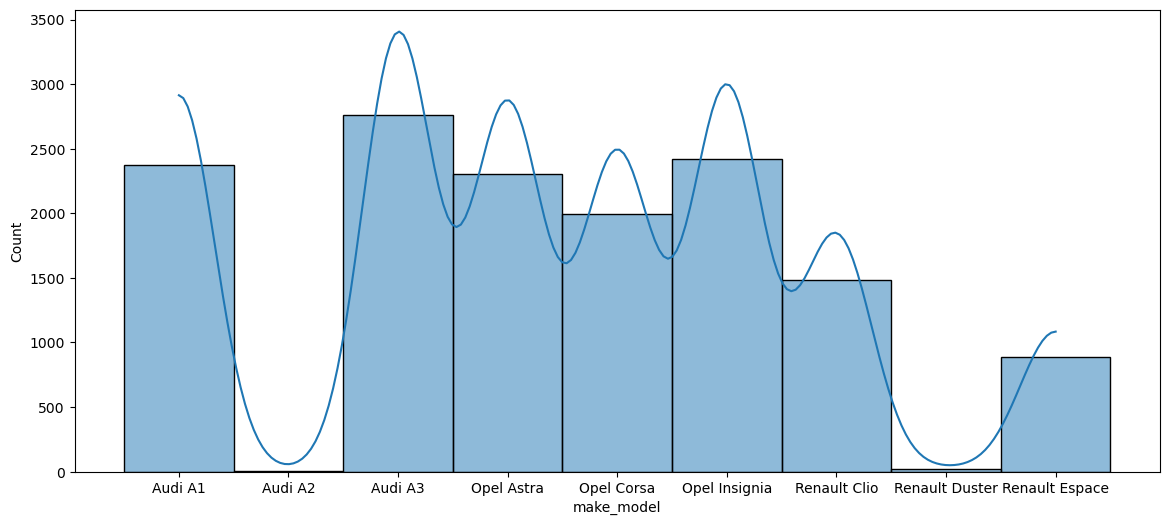

In [20]:
#Seeing the histplot of make_model
sns.histplot(df["make_model"], kde=True)
plt.show()
#We can see the same here as well, the values of Audi A3 and Renault Duster are so small

In [26]:
#Seeing the value counts of make_model
df.make_model.value_counts()
#As we can see, there are some of them have low values, so i am going to drop them (Audi A3 and Renault Duster)

make_model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Renault Duster      20
Audi A2              1
Name: count, dtype: int64

In [27]:
#Making a variable to see the classes that have less than 100, as it may affect the model
low = df.make_model.value_counts()[df.make_model.value_counts() <= 100].index
low

Index(['Renault Duster', 'Audi A2'], dtype='object', name='make_model')

In [28]:
#Dropping the low values of make_model
for i in low:
    drop_index = df[df['make_model'] == i].index
    df.drop(index = drop_index, inplace=True)

df.reset_index(drop=True, inplace=True)

In [29]:
#Seeing the value counts of make_model after dropping
df.make_model.value_counts()
#As we can see, now we do not have classes with less than 100

make_model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Name: count, dtype: int64

### body_type

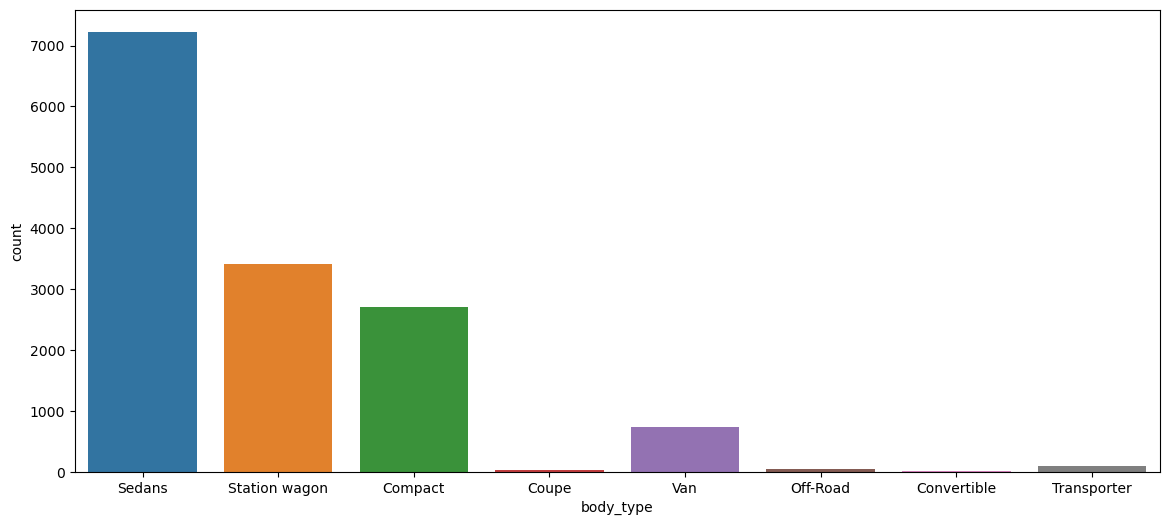

In [22]:
#Seeing the countplot of body_type
sns.countplot(x=df["body_type"])
plt.show()
#As we can see from the graph, we have 8 classes, for coupe, Off-Road, convertible, and Transporter, we can see that they 
#have tiny values.

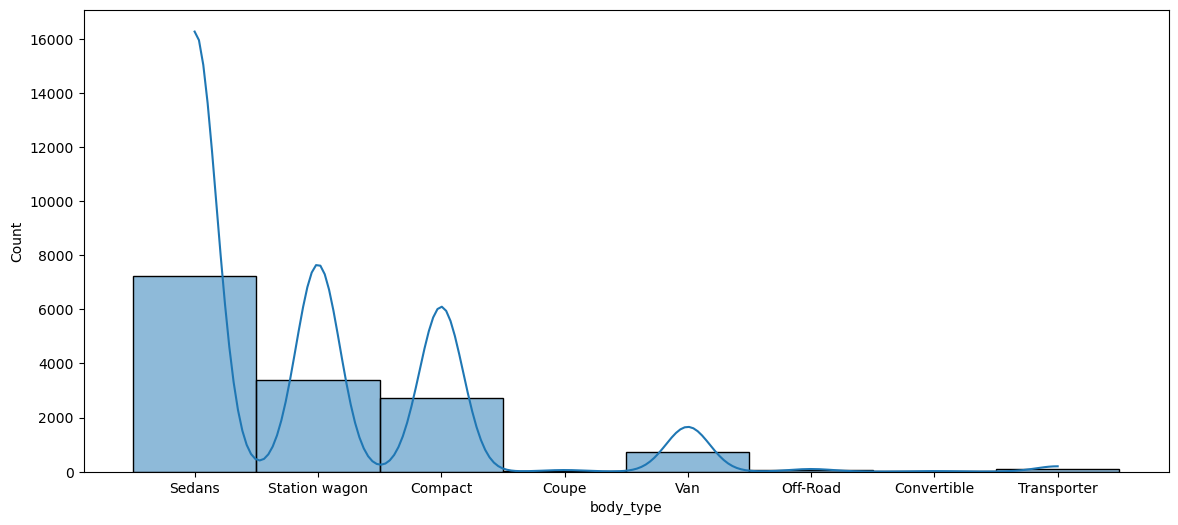

In [23]:
#Seeing the histplot of body_type
sns.histplot(df["body_type"], kde=True)
plt.show()
#We can see the same here as well, for coupe, Off-Road, convertible, and Transporter, we can see that they 
#have tiny values.

In [30]:
#Seeing the value counts of body_type
df.body_type.value_counts()

body_type
Sedans           7230
Station wagon    3405
Compact          2710
Van               735
Transporter        87
Coupe              25
Off-Road           21
Convertible         8
Name: count, dtype: int64

### price

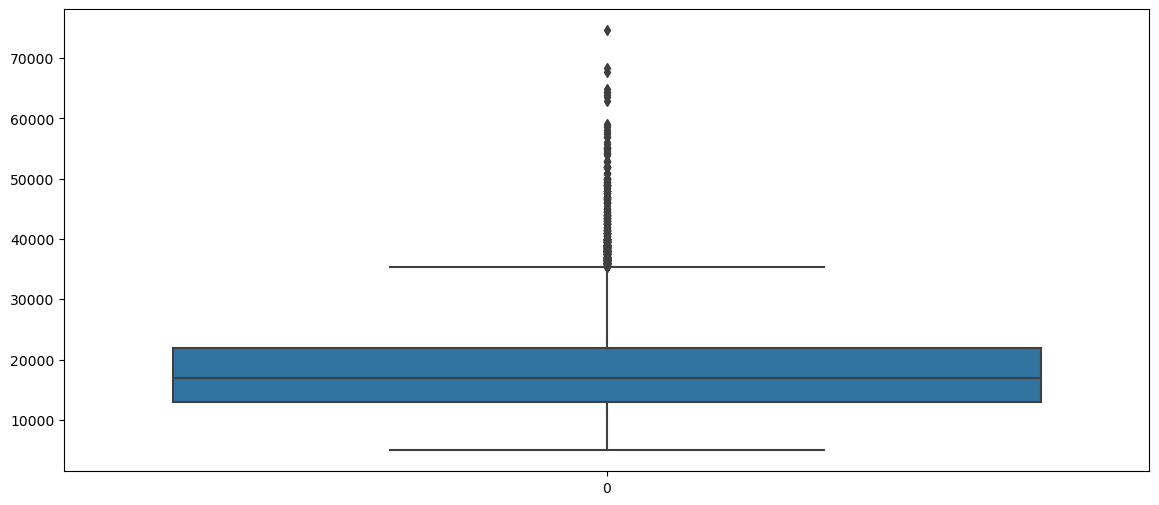

In [24]:
#SEeing teh boxplot of price
sns.boxplot(df['price'])
plt.show()
#As we can see, there are some outliers in price, but i am not going to drop them, becasue i think that they are not so much 
#and also, the prices are not so high 

In [25]:
#Seeing the value counts of price
df.price.value_counts()

price
14990    124
15990    121
15900    105
17990    100
10990     92
        ... 
23845      1
20860      1
21005      1
21334      1
39875      1
Name: count, Length: 2952, dtype: int64

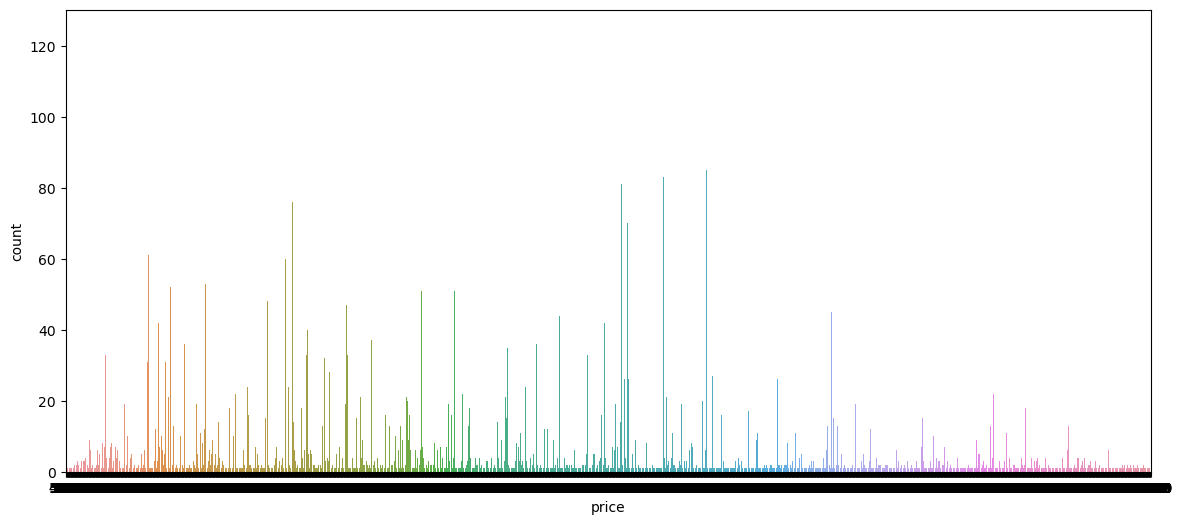

In [32]:
#Seeing the countplot of price
sns.countplot(x=df["price"])
plt.show()
#As we can see from the graph, there are a lot of values. So, it is not shown very well in this countplot

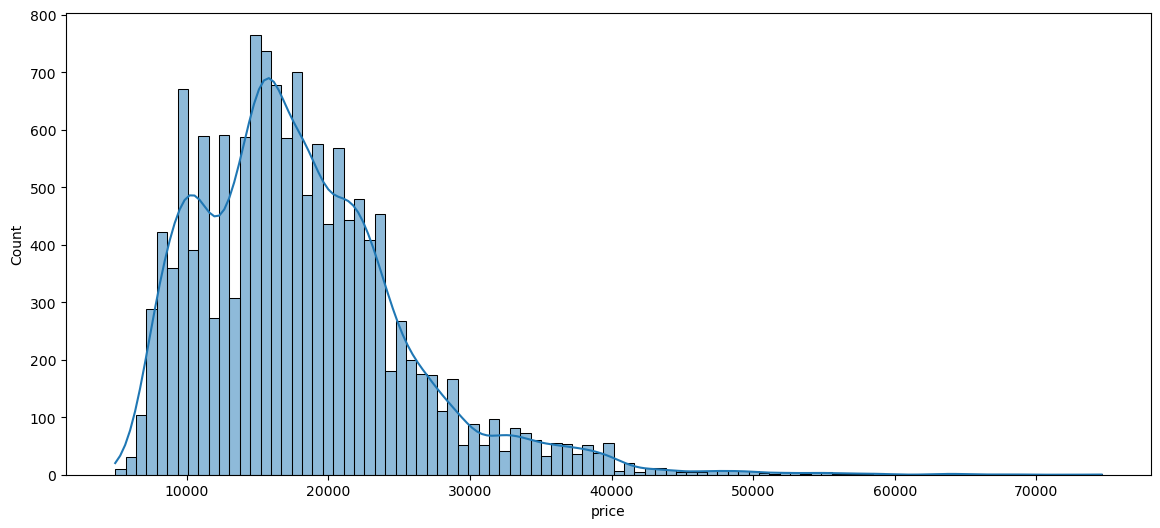

In [33]:
#Seeing the histplot of price
sns.histplot(df["price"], kde=True)
plt.show()
#As we can see, there are low values from about 40000 to 70000

### vat

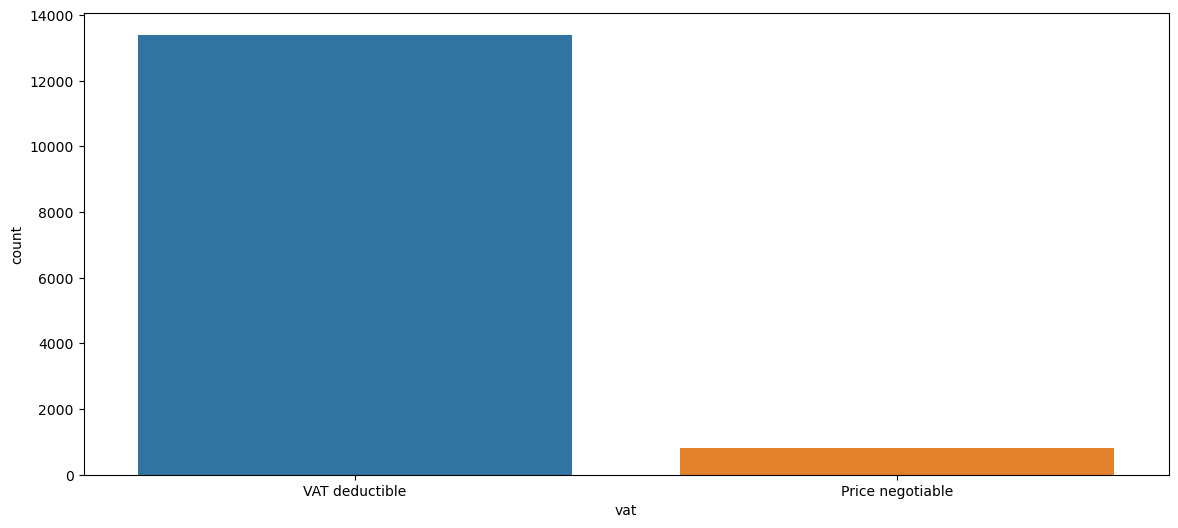

In [35]:
#Seeing the countplot of vat
sns.countplot(x=df["vat"])
plt.show()
#As we can see from the graph, there are two classes, but VAT deductible is more than Price negotiable

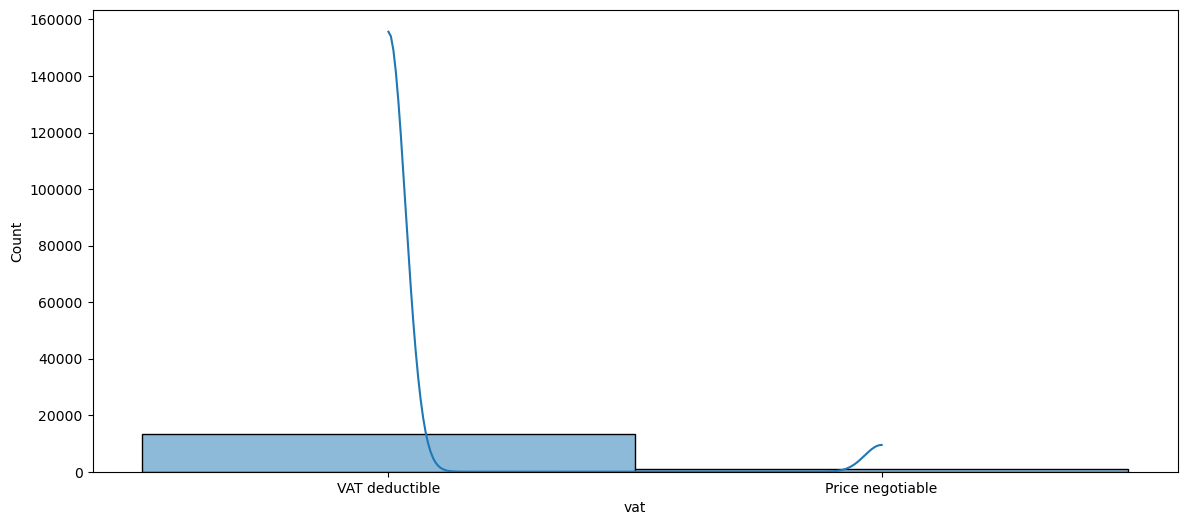

In [36]:
#Seeing the histplot of vat
sns.histplot(df["vat"], kde=True)
plt.show()

In [37]:
#Seeing the value counts of price
df.vat.value_counts()
#We can see from here that VAT deductible has about 13405 and this is more that Price negotiable

vat
VAT deductible      13405
Price negotiable      816
Name: count, dtype: int64

### km

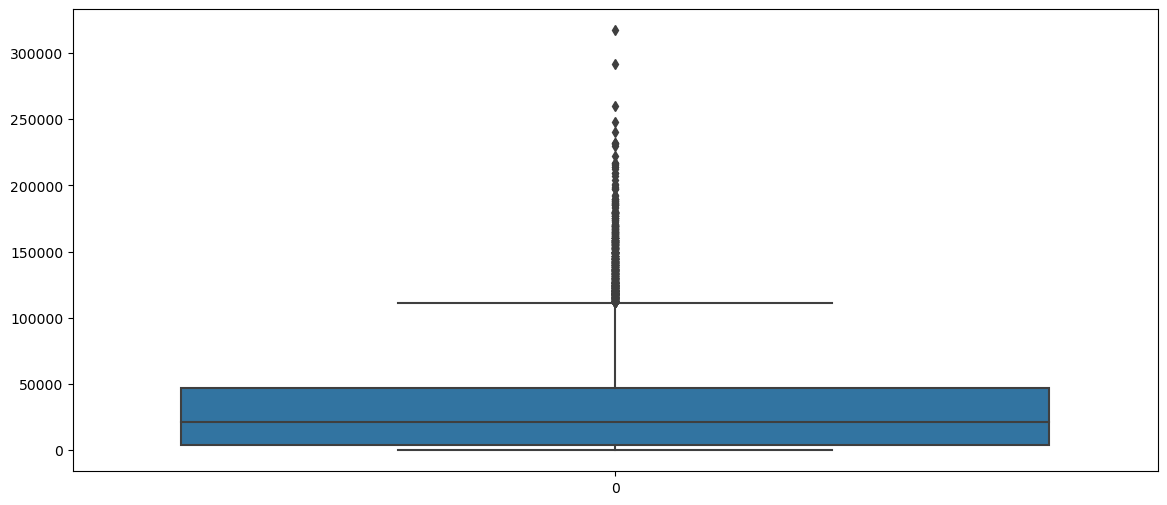

In [38]:
#SEeing teh boxplot of km
sns.boxplot(df['km'])
plt.show()
#As we can see, there are some outliers in km

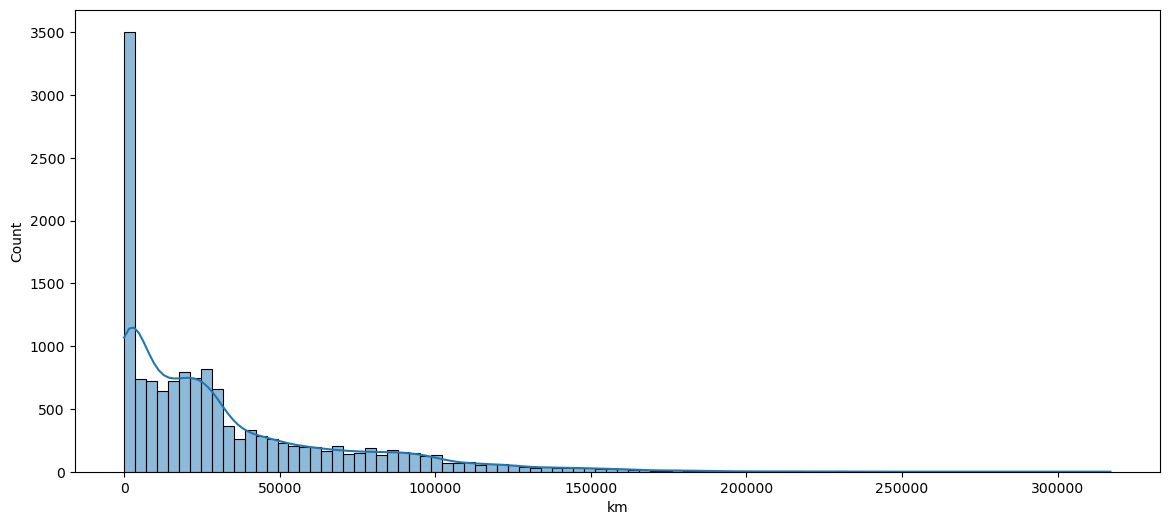

In [40]:
#Seeing the histplot of km
sns.histplot(df["km"], kde=True)
plt.show()

### Type

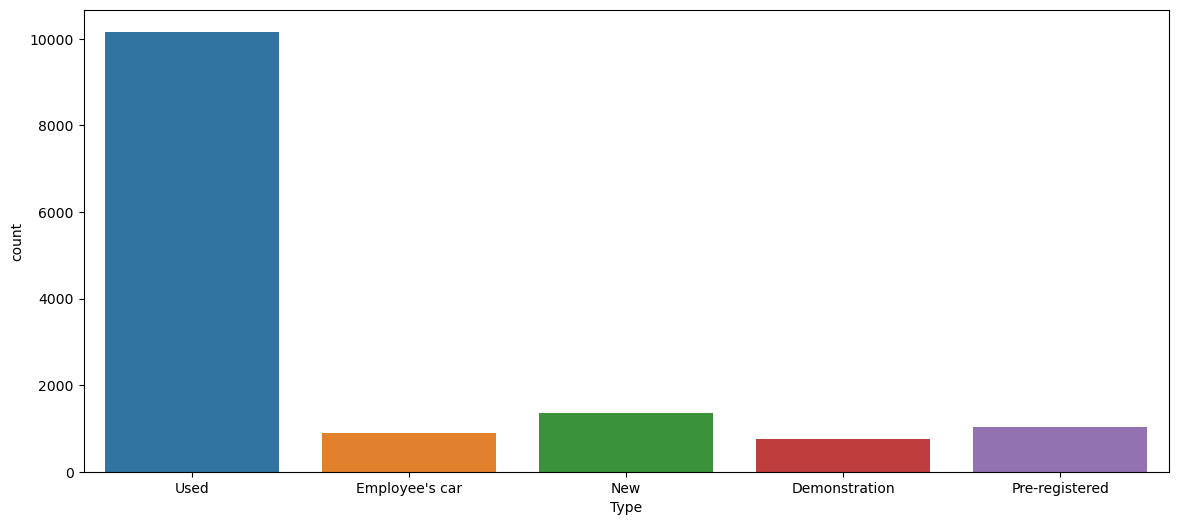

In [42]:
#Seeing the countplot of Type
sns.countplot(x=df["Type"])
plt.show()
#As we can see from the graph, there are 5 classes, and Used has the highest value comapred with the others

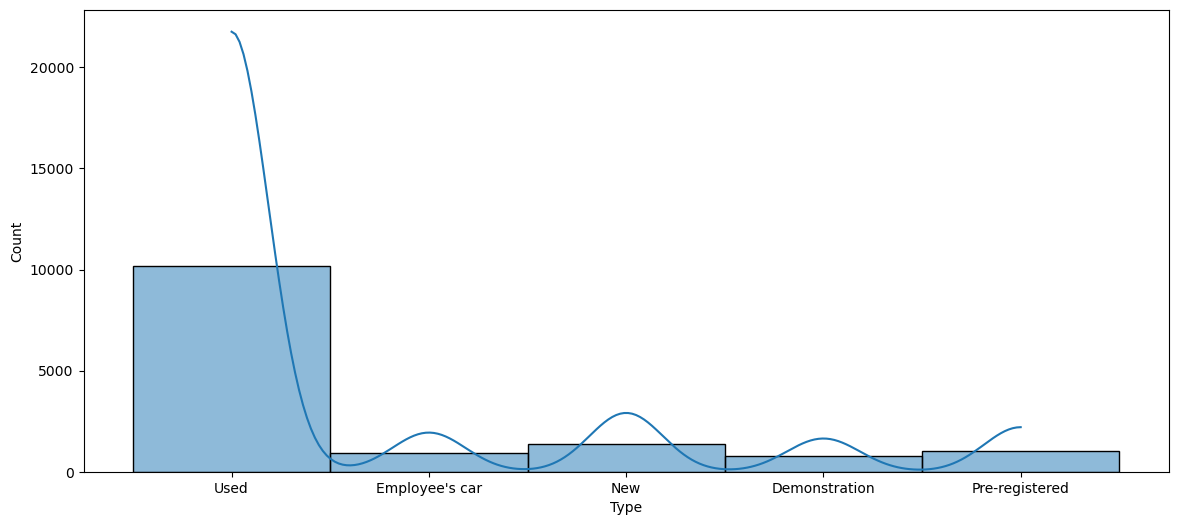

In [43]:
#Seeing the histplot of Type
sns.histplot(df["Type"], kde=True)
plt.show()

### Fuel

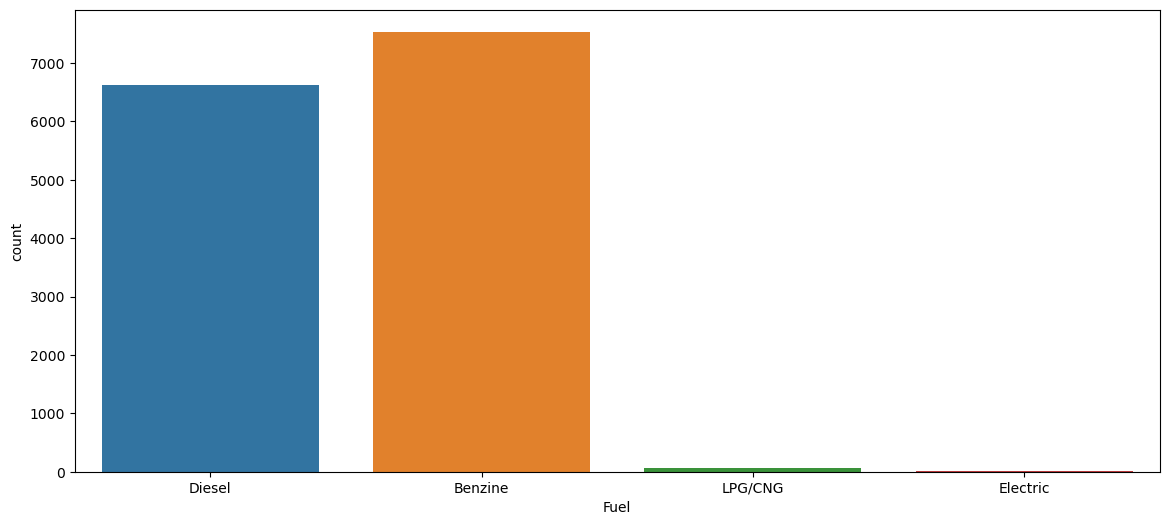

In [44]:
#Seeing the countplot of Fuel
sns.countplot(x=df["Fuel"])
plt.show()
#As we can see from the graph, there are 4 classes, the most used ones are Diesel and Benzine

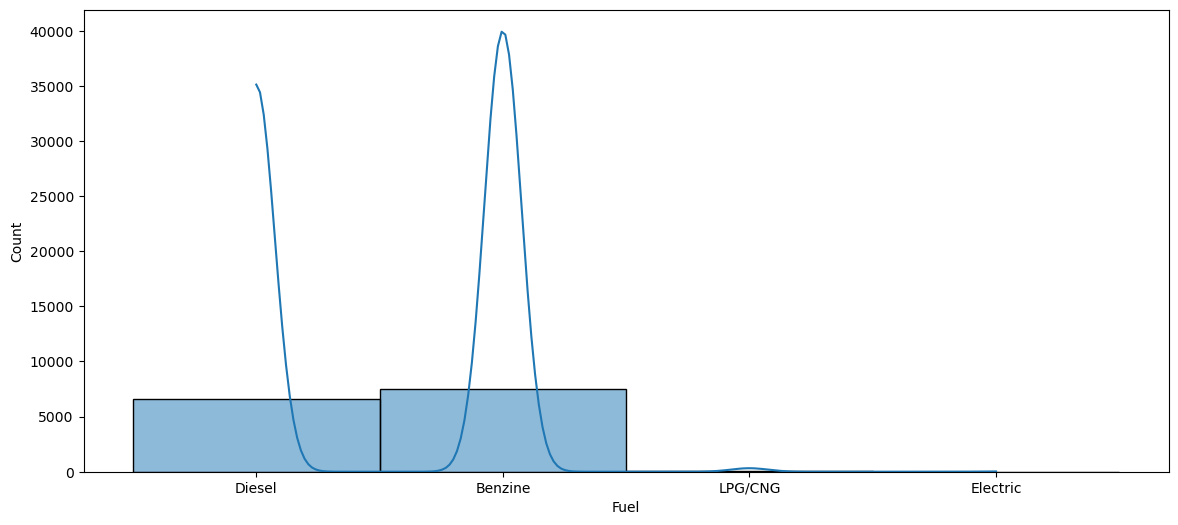

In [45]:
#Seeing the histplot of Fuel
sns.histplot(df["Fuel"], kde=True)
plt.show()

### Gears

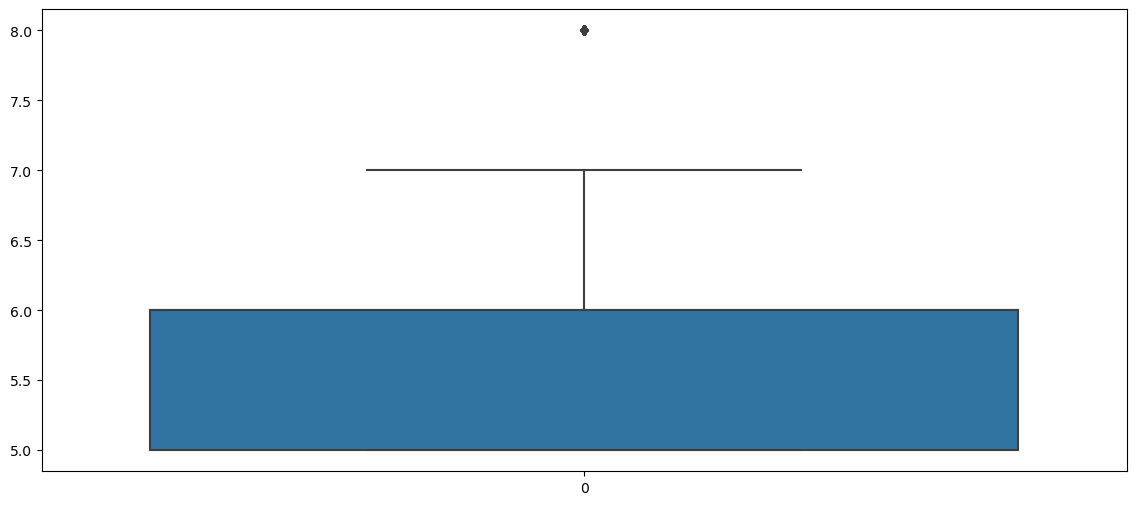

In [48]:
#SEeing teh boxplot of Gears
sns.boxplot(df['Gears'])
plt.show()
#As we can see, there are some outliers in Gears

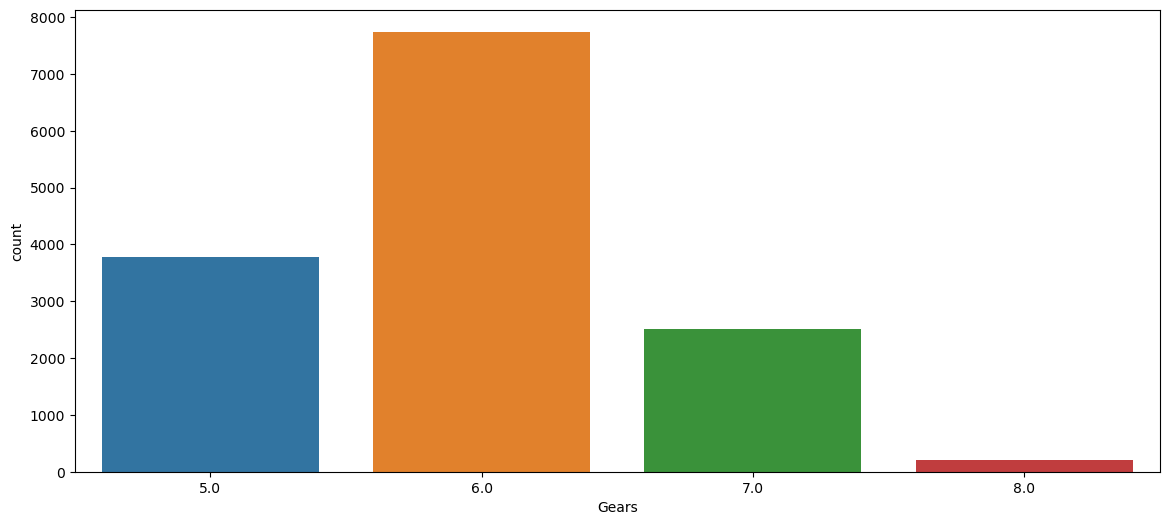

In [46]:
#Seeing the countplot of Gears
sns.countplot(x=df["Gears"])
plt.show()
#As we can see from the graph, there are 4 classes, the most used ones is 6.0, but 8.0 is not used so much

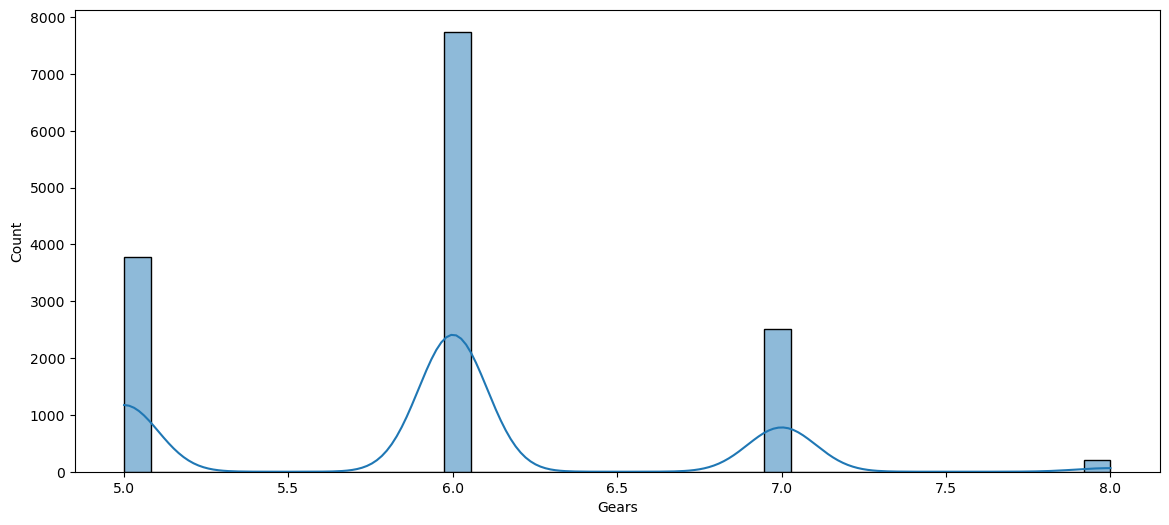

In [47]:
#Seeing the histplot of Gears
sns.histplot(df["Gears"], kde=True)
plt.show()

### Comfort_Convenience 

In [52]:
#Seeing the Comfort_Convenience
df["Comfort_Convenience"]
#As we can see, this is not good for plotting, so i am not going to plot this one

0        Air conditioning,Armrest,Automatic climate con...
1        Air conditioning,Automatic climate control,Hil...
2        Air conditioning,Cruise control,Electrical sid...
3        Air suspension,Armrest,Auxiliary heating,Elect...
4        Air conditioning,Armrest,Automatic climate con...
                               ...                        
14216    Air conditioning,Armrest,Automatic climate con...
14217    Air conditioning,Automatic climate control,Cru...
14218    Air conditioning,Armrest,Automatic climate con...
14219    Air conditioning,Automatic climate control,Cru...
14220    Air conditioning,Armrest,Automatic climate con...
Name: Comfort_Convenience, Length: 14221, dtype: object

### Entertainment_Media

In [53]:
#Seeing Entertainment_Media
df["Entertainment_Media"]
#As we can see, this is not good for plotting, so i am not going to plot this one

0        Bluetooth,Hands-free equipment,On-board comput...
1        Bluetooth,Hands-free equipment,On-board comput...
2                                    MP3,On-board computer
3        Bluetooth,CD player,Hands-free equipment,MP3,O...
4        Bluetooth,CD player,Hands-free equipment,MP3,O...
                               ...                        
14216    Bluetooth,Digital radio,Hands-free equipment,O...
14217    Bluetooth,Digital radio,Hands-free equipment,O...
14218    Bluetooth,Digital radio,Hands-free equipment,M...
14219    Bluetooth,Digital radio,Hands-free equipment,R...
14220    Bluetooth,Hands-free equipment,On-board comput...
Name: Entertainment_Media, Length: 14221, dtype: object

###  Extras

In [54]:
#Seeing Extras
df["Extras"]
#As we can see, this is not good for plotting, so i am not going to plot this one

0           Alloy wheels,Catalytic Converter,Voice Control
1        Alloy wheels,Sport seats,Sport suspension,Voic...
2                               Alloy wheels,Voice Control
3                   Alloy wheels,Sport seats,Voice Control
4        Alloy wheels,Sport package,Sport suspension,Vo...
                               ...                        
14216              Alloy wheels,Touch screen,Voice Control
14217                            Alloy wheels,Touch screen
14218    Alloy wheels,Catalytic Converter,Sport suspens...
14219              Alloy wheels,Touch screen,Voice Control
14220                                         Alloy wheels
Name: Extras, Length: 14221, dtype: object

### Safety_Security 

In [56]:
#Seeing Safety_Security
df["Safety_Security"]
#As we can see, this is not good for plotting, so i am not going to plot this one

0        ABS,Central door lock,Daytime running lights,D...
1        ABS,Central door lock,Central door lock with r...
2        ABS,Central door lock,Daytime running lights,D...
3        ABS,Alarm system,Central door lock with remote...
4        ABS,Central door lock,Driver-side airbag,Elect...
                               ...                        
14216    ABS,Adaptive Cruise Control,Central door lock,...
14217    ABS,Central door lock,Central door lock with r...
14218    ABS,Adaptive Cruise Control,Blind spot monitor...
14219    ABS,Adaptive Cruise Control,Blind spot monitor...
14220    ABS,Adaptive Cruise Control,Blind spot monitor...
Name: Safety_Security, Length: 14221, dtype: object

### age 

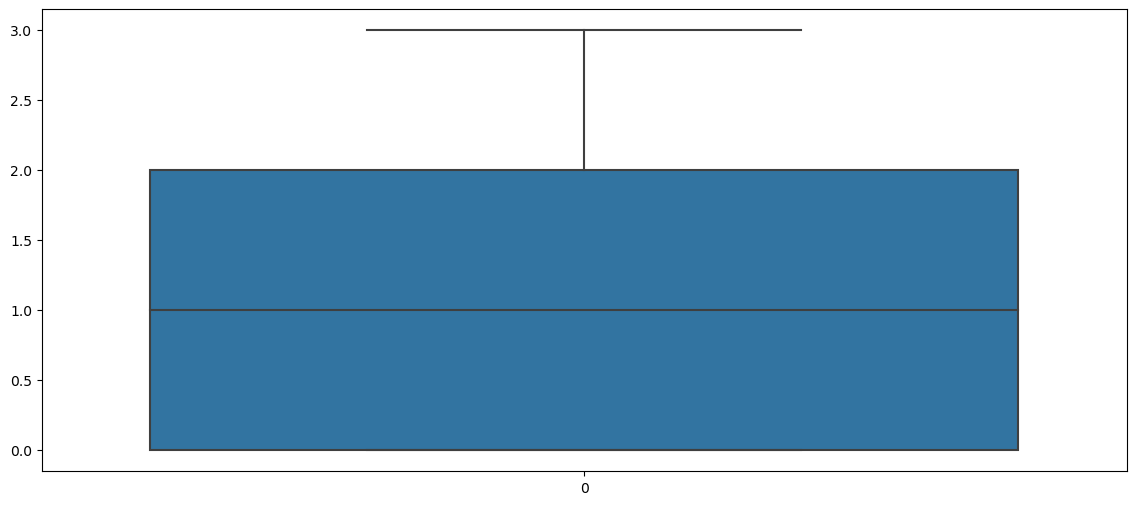

In [57]:
#Seeing teh boxplot of age
sns.boxplot(df['age'])
plt.show()
#As we can see, there is no outliers

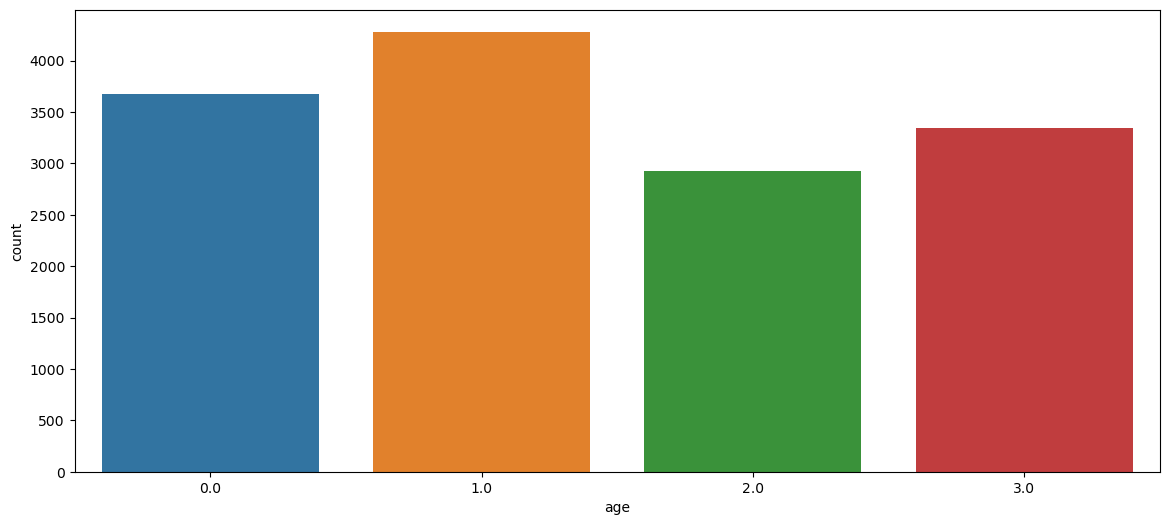

In [58]:
#Seeing the countplot of age
sns.countplot(x=df["age"])
plt.show()
#As we can see from the graph, there are 4 classes and class one is the highest

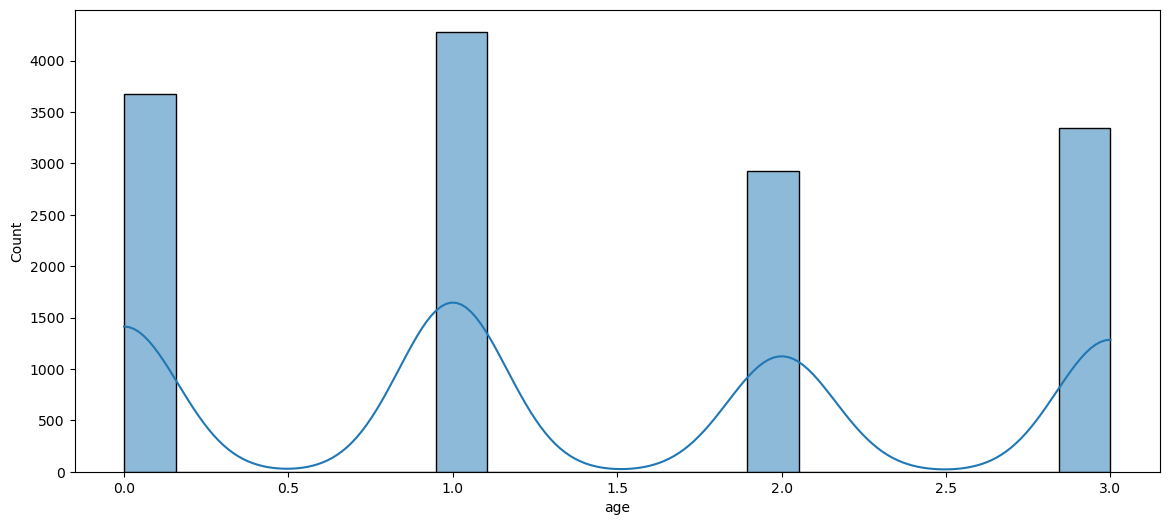

In [59]:
#Seeing the histplot of age
sns.histplot(df["age"], kde=True)
plt.show()

### Previous_Owners 

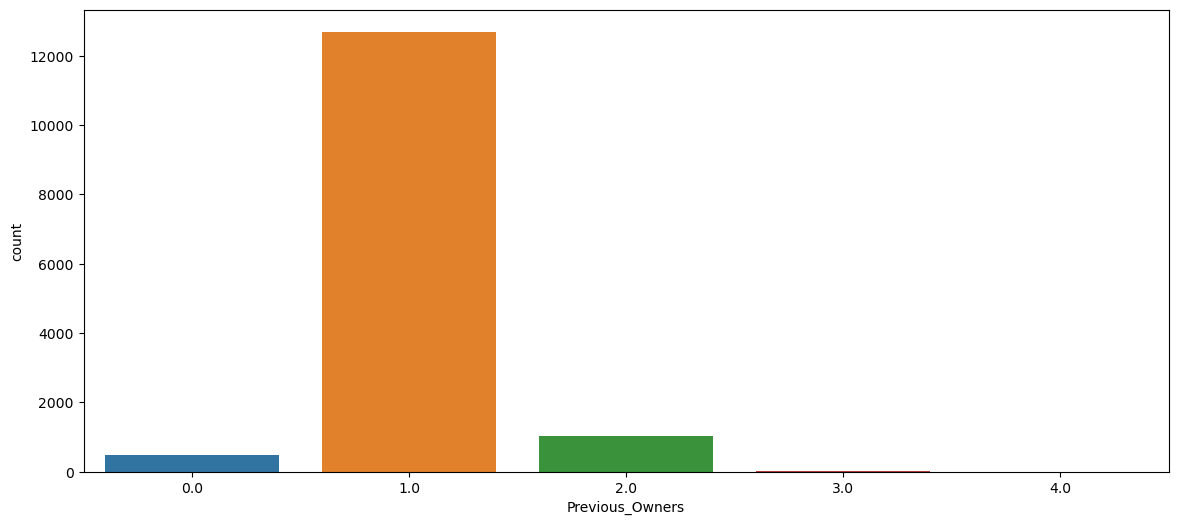

In [61]:
#Seeing the countplot of Previous_Owners
sns.countplot(x=df["Previous_Owners"])
plt.show()
#As we can see from the graph, there are 5 classes, class 1 is the highest compared with the tiny values of the others

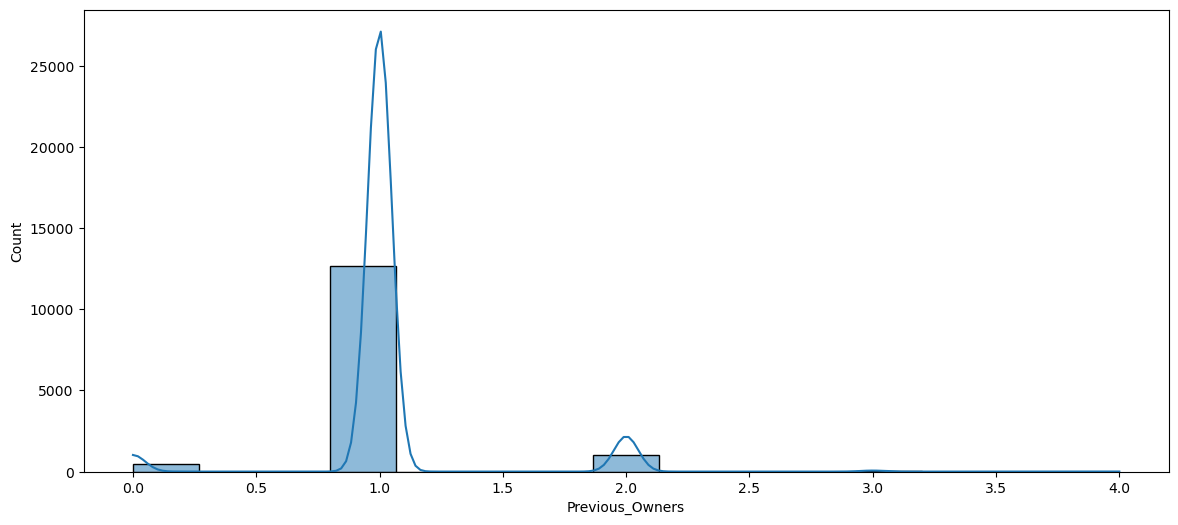

In [62]:
#Seeing the histplot of Previous_Owners
sns.histplot(df["Previous_Owners"], kde=True)
plt.show()

### hp_kW 

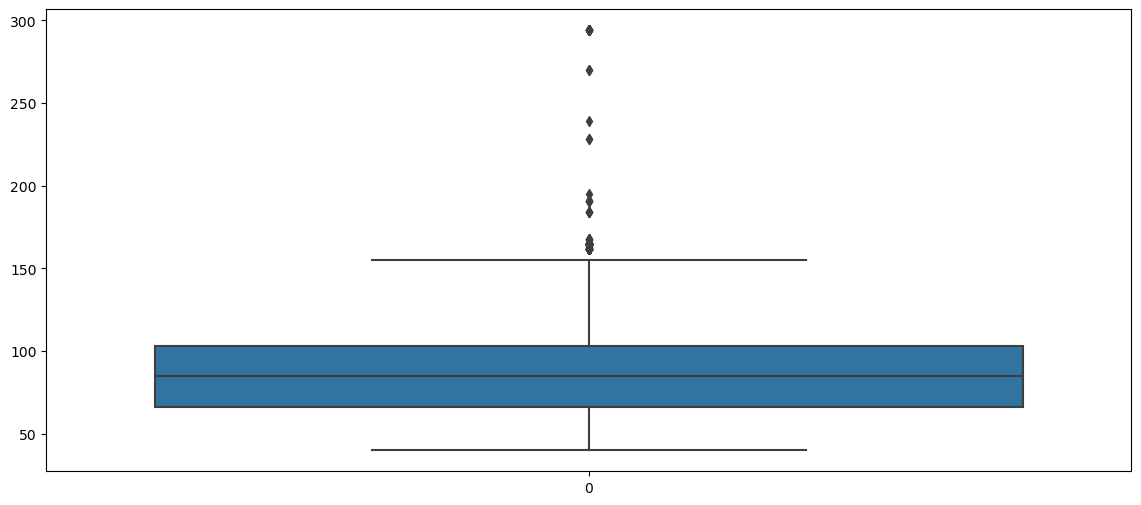

In [63]:
#SEeing teh boxplot of hp_kW
sns.boxplot(df['hp_kW'])
plt.show()
#As we can see, there are some outliers in hp_kW

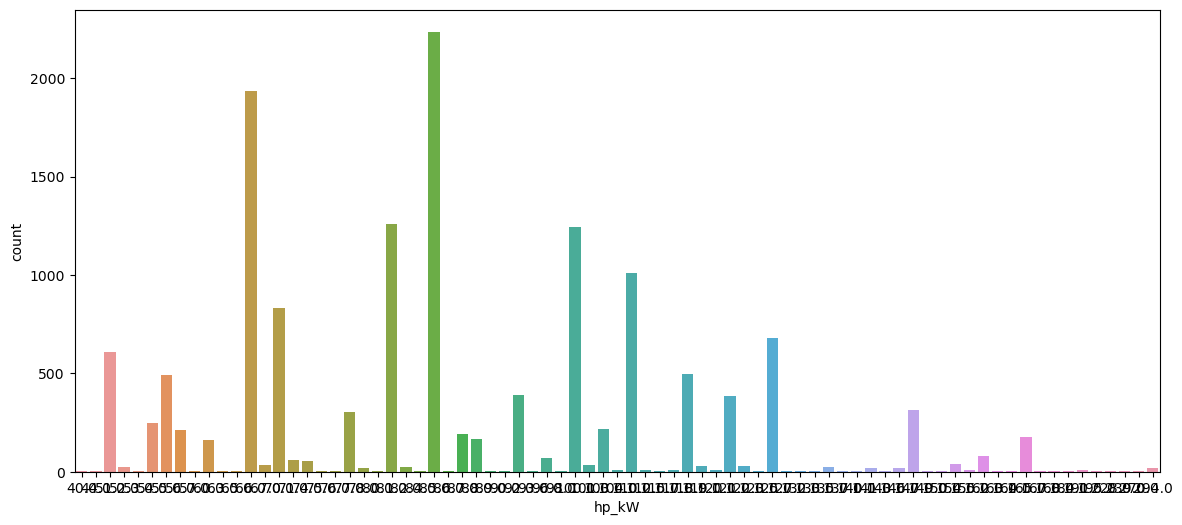

In [64]:
#Seeing the countplot of hp_kW
sns.countplot(x=df["hp_kW"])
plt.show()

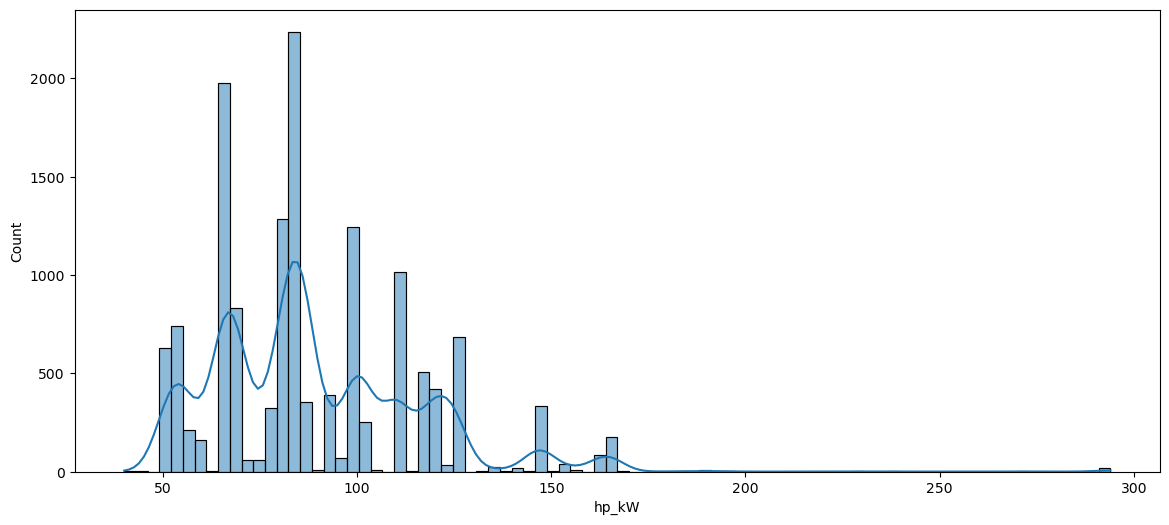

In [69]:
#Seeing the histplot of hp_kW
sns.histplot(df["hp_kW"], kde=True)
plt.show()

### Inspection_new 
       

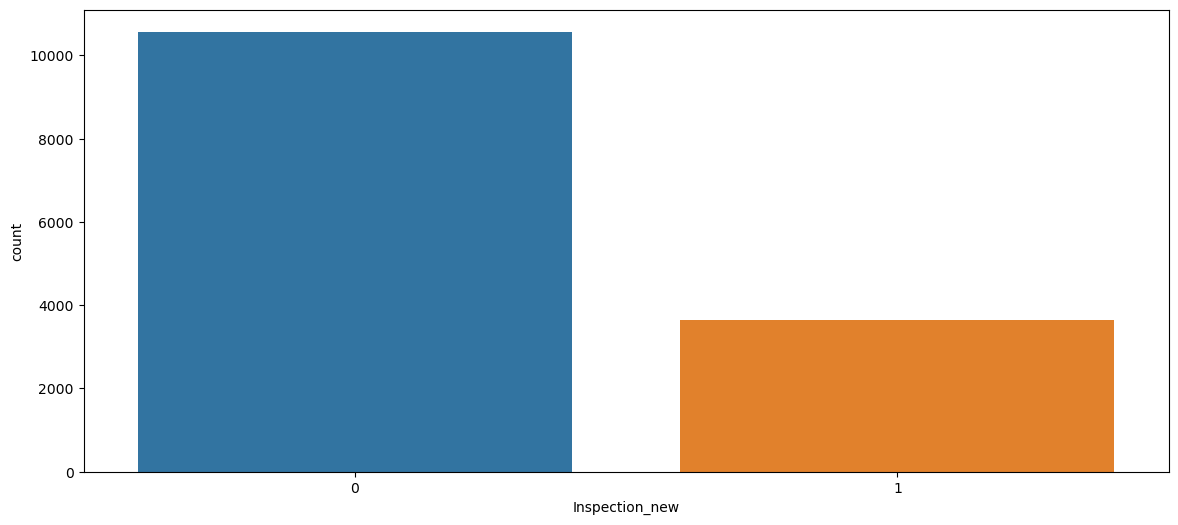

In [66]:
#Seeing the countplot of Inspection_new
sns.countplot(x=df["Inspection_new"])
plt.show()
#As we can see from the graph, there are 2 classes, class 0 is the highest compared to class 1

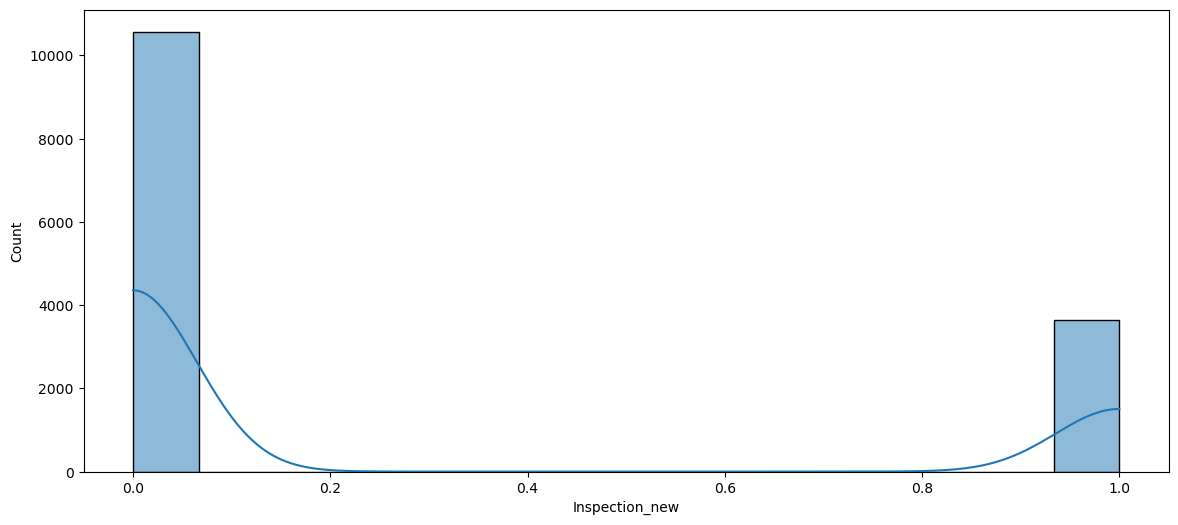

In [67]:
#Seeing the histplot of Inspection_new
sns.histplot(df["Inspection_new"], kde=True)
plt.show()

### Paint_Type 

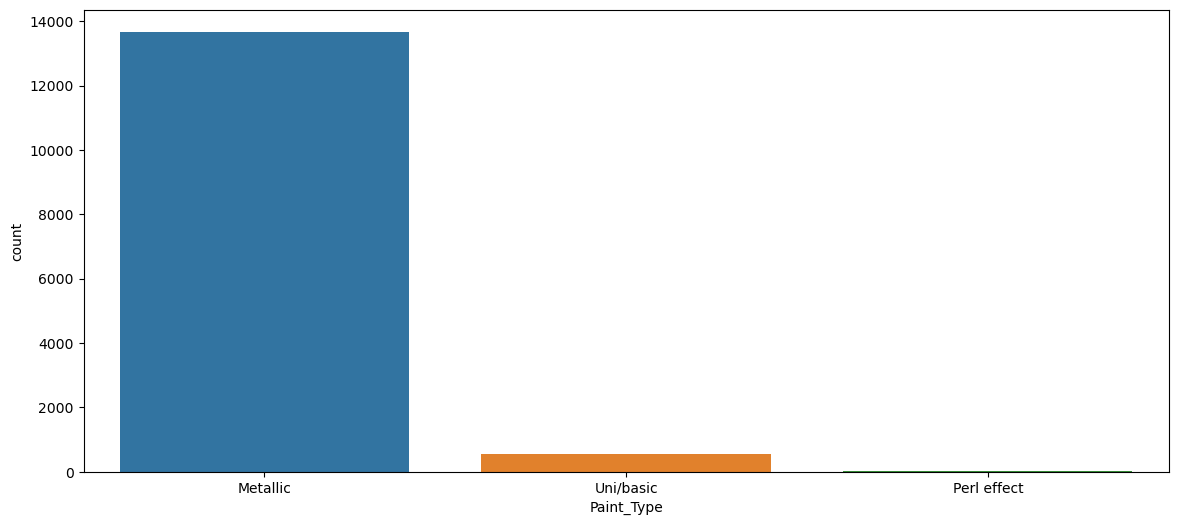

In [71]:
#Seeing the countplot of Paint_Type
sns.countplot(x=df["Paint_Type"])
plt.show()
#As we can see from the graph, there are 3 classes, Metalic has a lot of values but the others have so small values

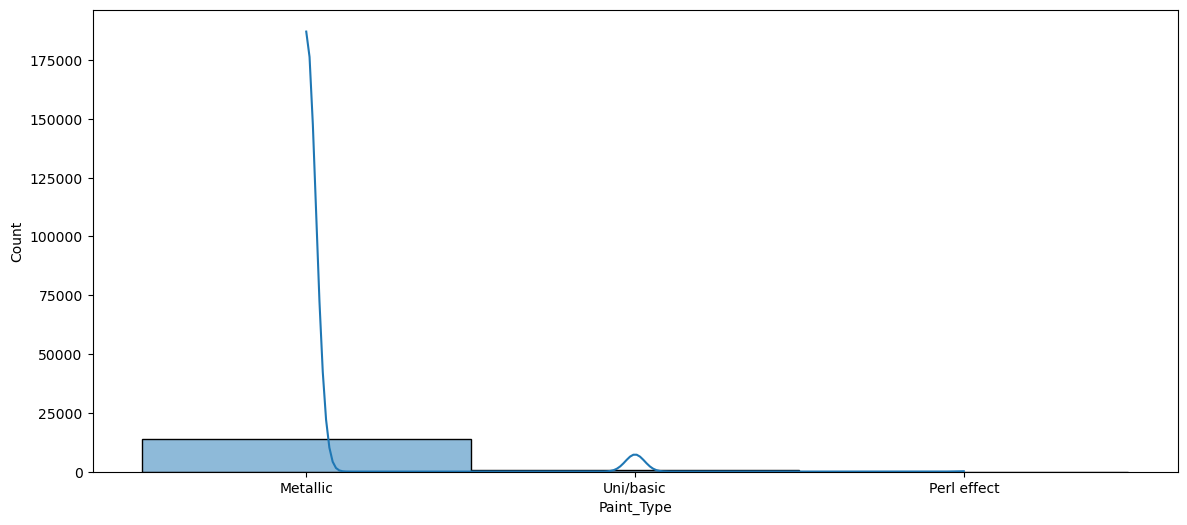

In [72]:
#Seeing the histplot of Paint_Type
sns.histplot(df["Paint_Type"], kde=True)
plt.show()

### Upholstery_type 

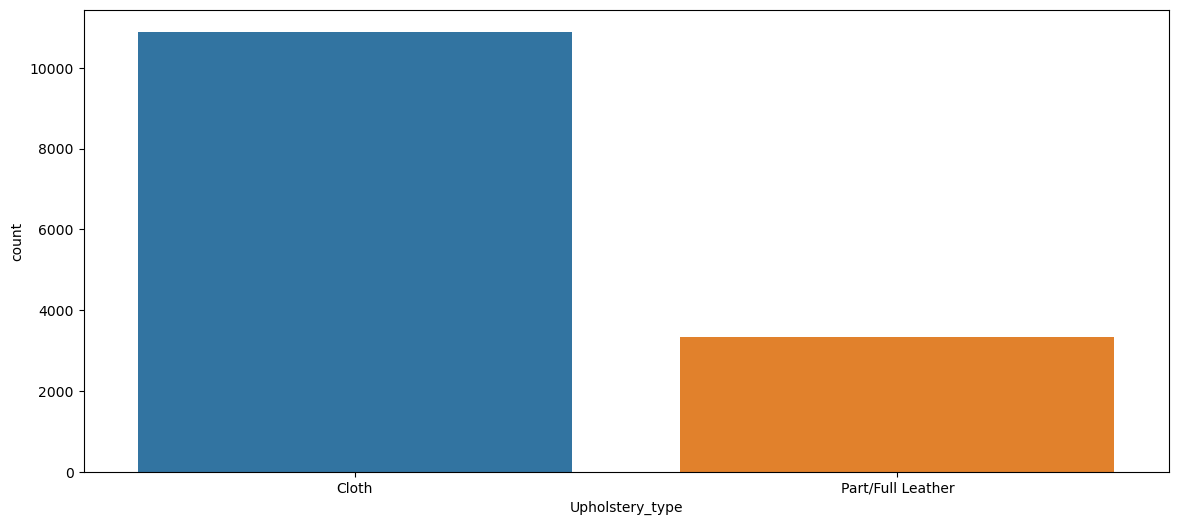

In [74]:
#Seeing the countplot of Upholstery_type
sns.countplot(x=df["Upholstery_type"])
plt.show()
#As we can see from the graph, there are 2 classes, Cloth has a lot of values. which means most of the cars have it

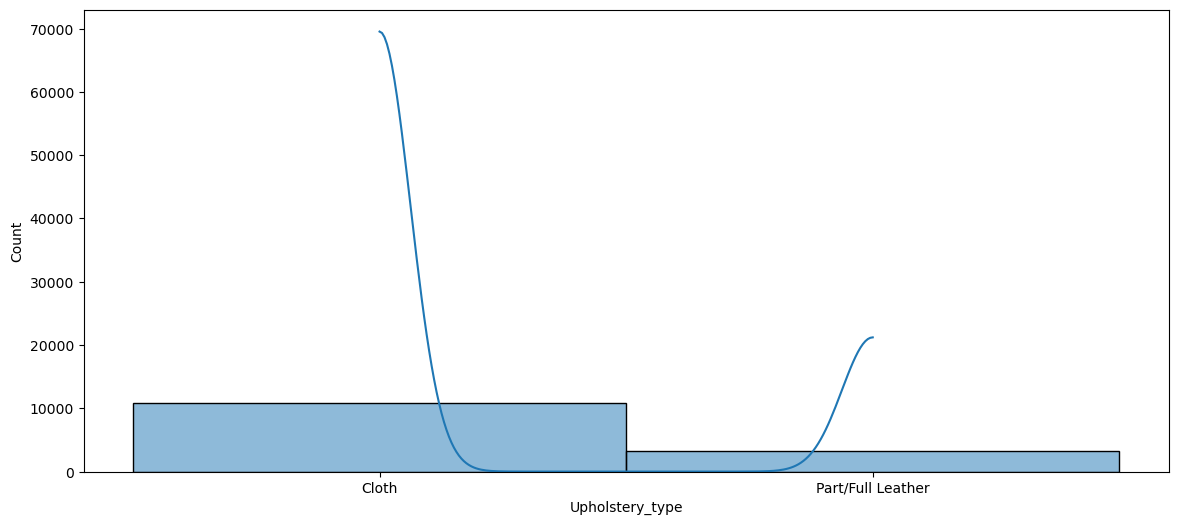

In [75]:
#Seeing the histplot of Upholstery_type
sns.histplot(df["Upholstery_type"], kde=True)
plt.show()

### Gearing_Type 

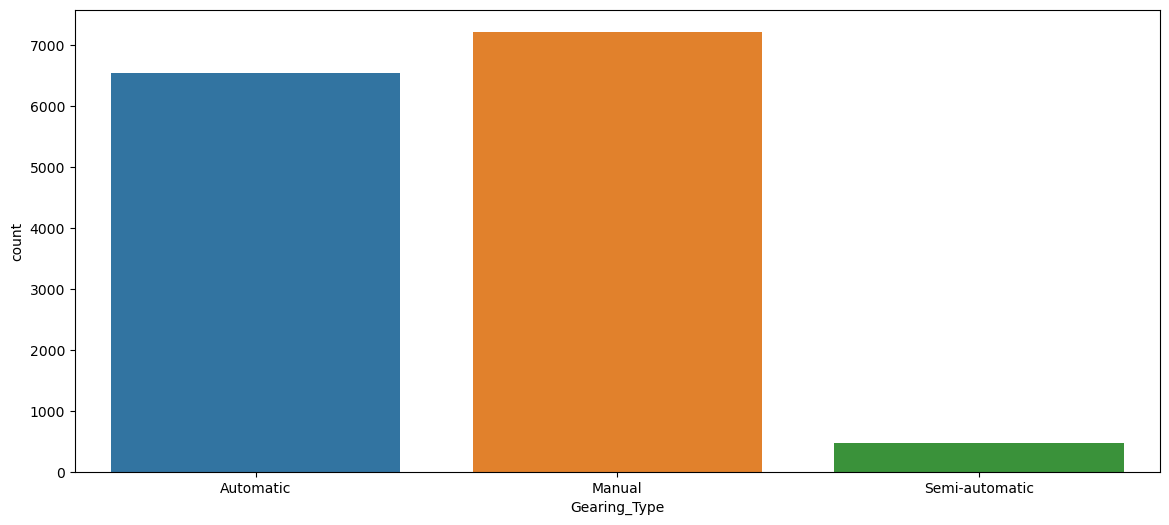

In [77]:
#Seeing the countplot of Gearing_Type
sns.countplot(x=df["Gearing_Type"])
plt.show()
#As we can see from the graph, there are 3 classes, Semi-automatic does not have a lot of values compared with the others

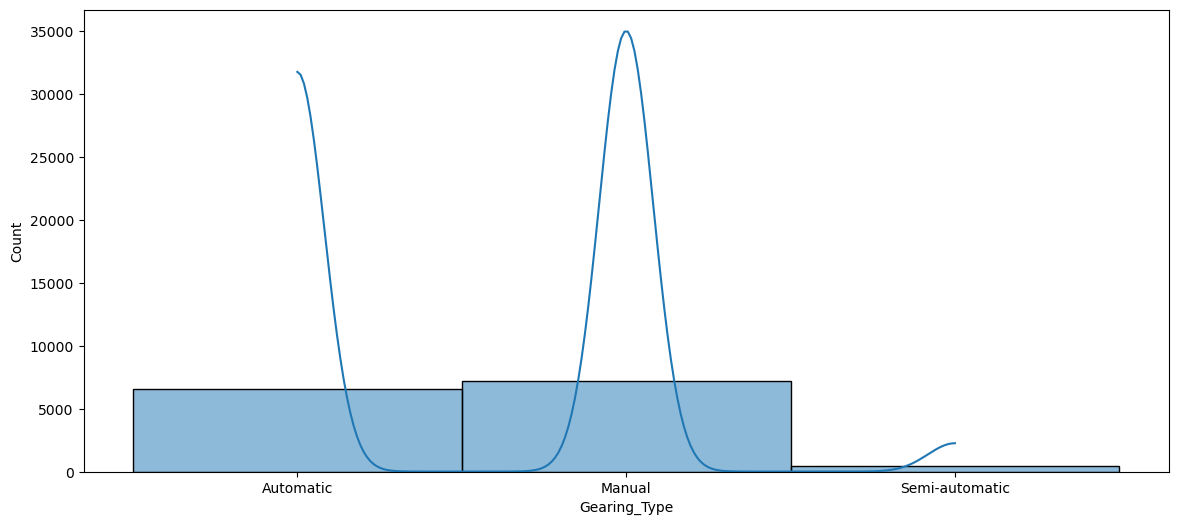

In [78]:
#Seeing the histplot of Gearing_Type
sns.histplot(df["Gearing_Type"], kde=True)
plt.show()

### Displacement_cc
      

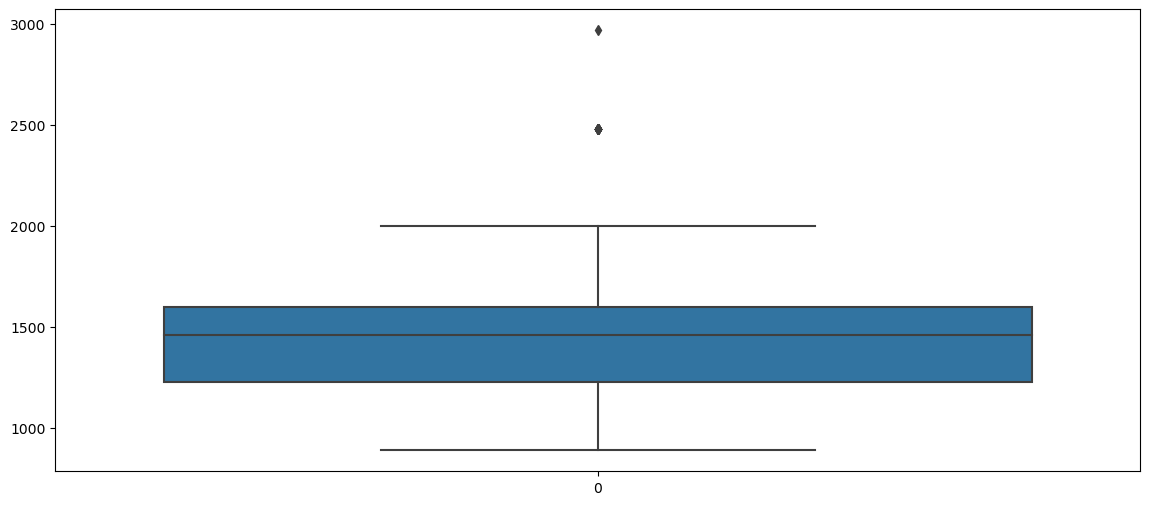

In [79]:
#SEeing teh boxplot of Displacement_cc
sns.boxplot(df['Displacement_cc'])
plt.show()
#As we can see, there are some outliers in Displacement_cc

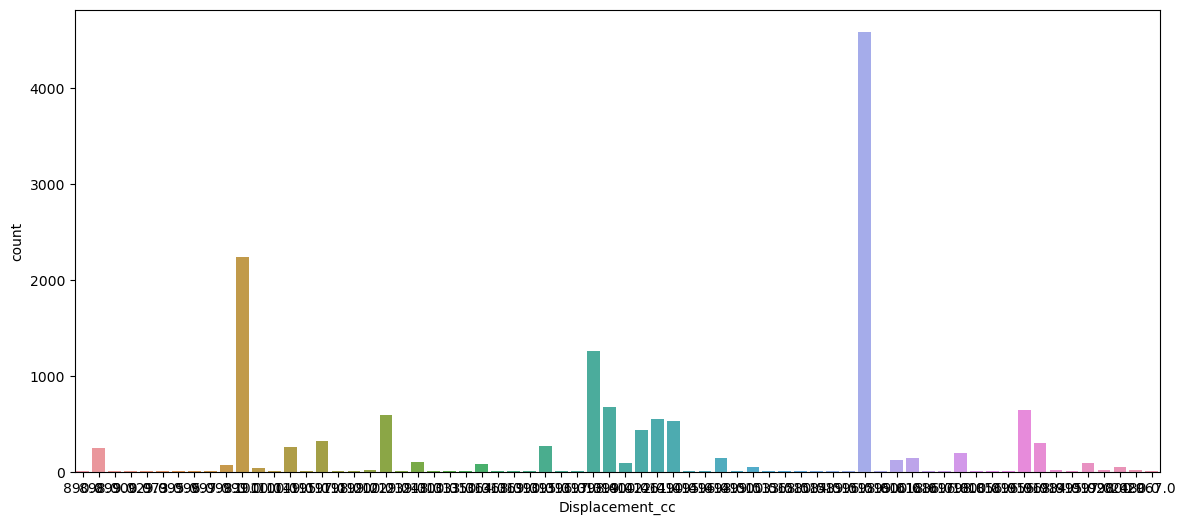

In [80]:
#Seeing the countplot of Displacement_cc
sns.countplot(x=df["Displacement_cc"])
plt.show()

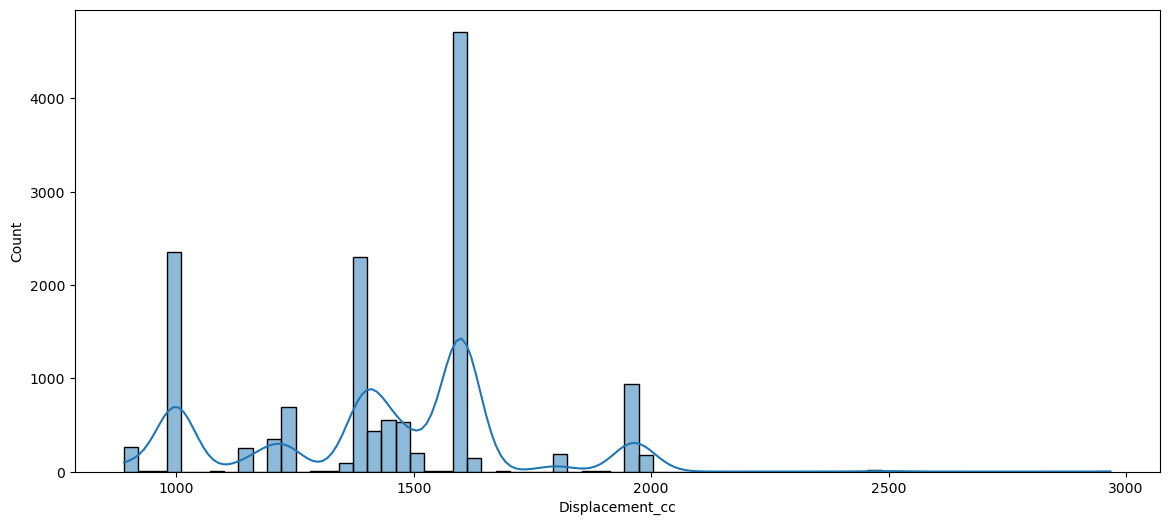

In [81]:
#Seeing the histplot of Displacement_cc
sns.histplot(df["Displacement_cc"], kde=True)
plt.show()

###  Weight_kg 

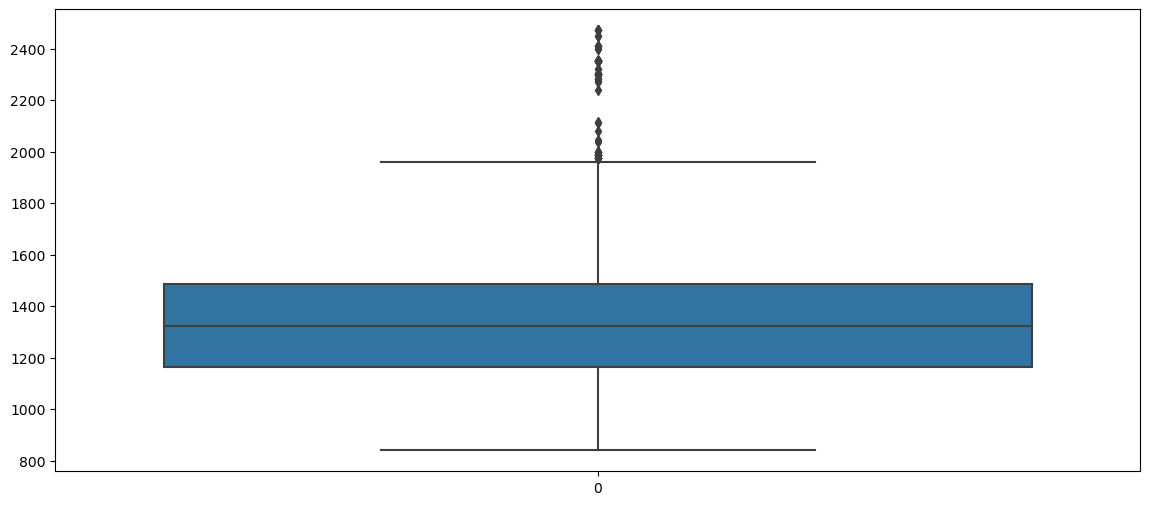

In [82]:
#SEeing teh boxplot of Weight_kg
sns.boxplot(df['Weight_kg'])
plt.show()
#As we can see, there are some outliers in Weight_kg

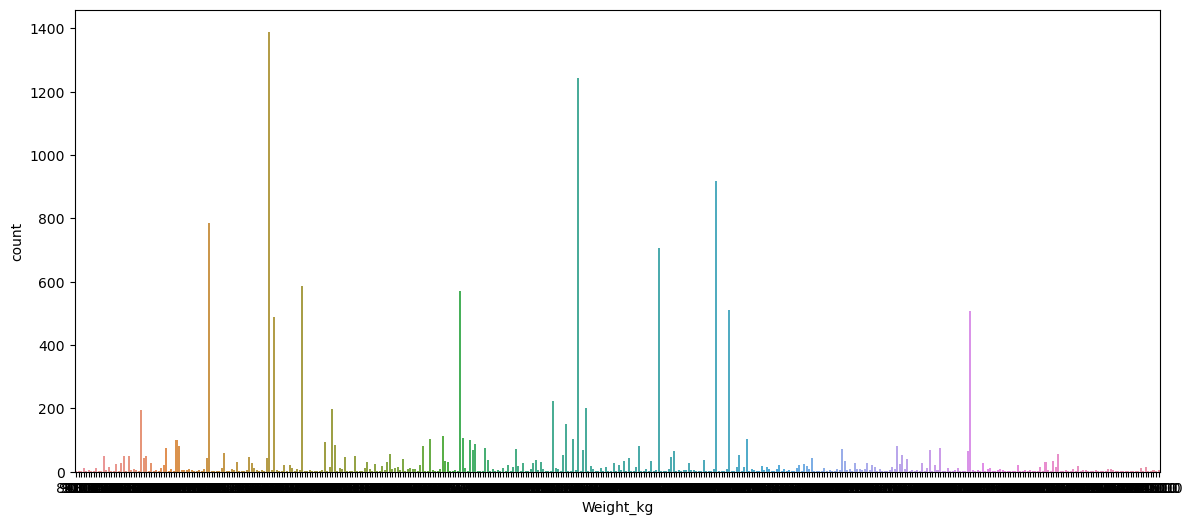

In [83]:
#Seeing the countplot of Weight_kg
sns.countplot(x=df["Weight_kg"])
plt.show()

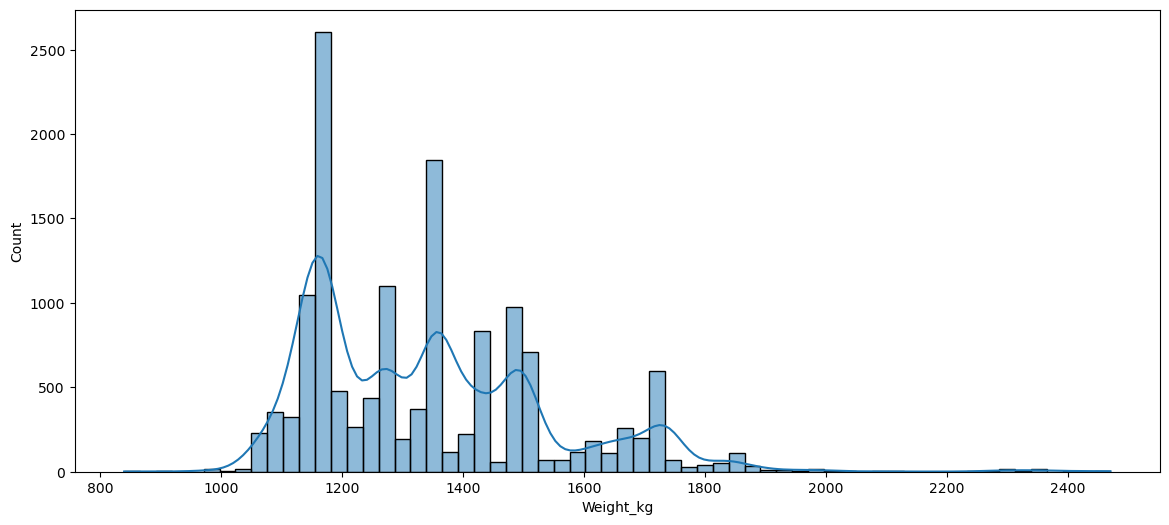

In [84]:
#Seeing the histplot of Weight_kg
sns.histplot(df["Weight_kg"], kde=True)
plt.show()
#As we can see, most of the values are located between 1000 and 1700

### Drive_chain 

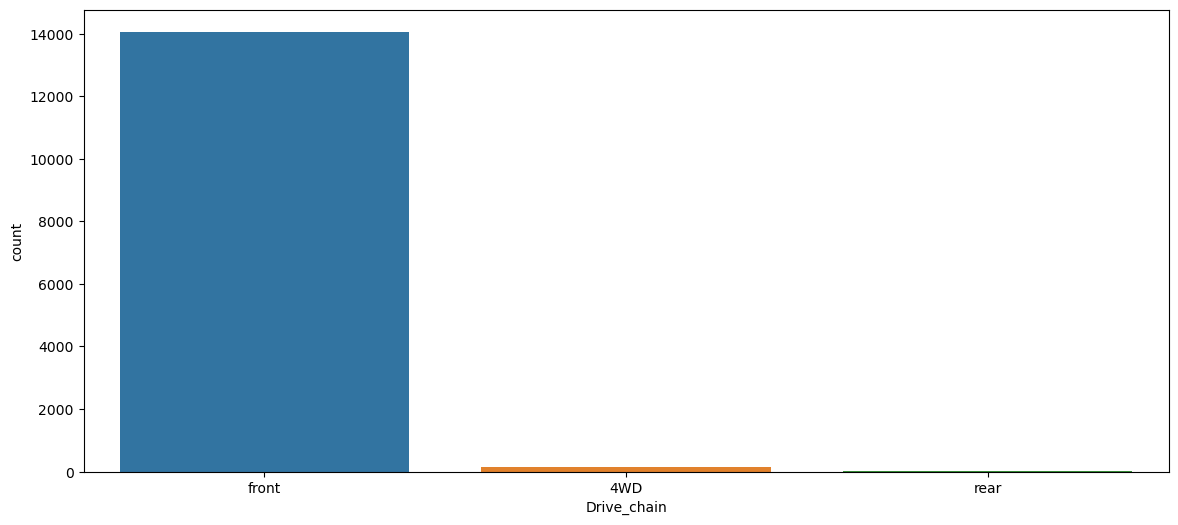

In [86]:
#Seeing the countplot of Drive_chain
sns.countplot(x=df["Drive_chain"])
plt.show()
#As we can see from the graph, there are 3 classes, front has a lot of values, but the others have only tiny values

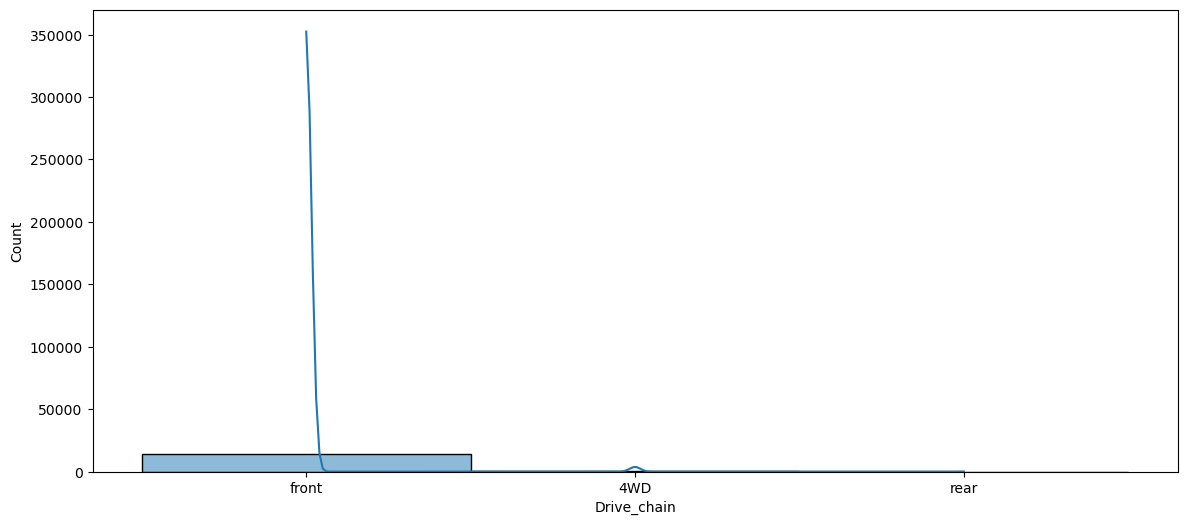

In [87]:
#Seeing the histplot of Drive_chain
sns.histplot(df["Drive_chain"], kde=True)
plt.show()

### cons_comb

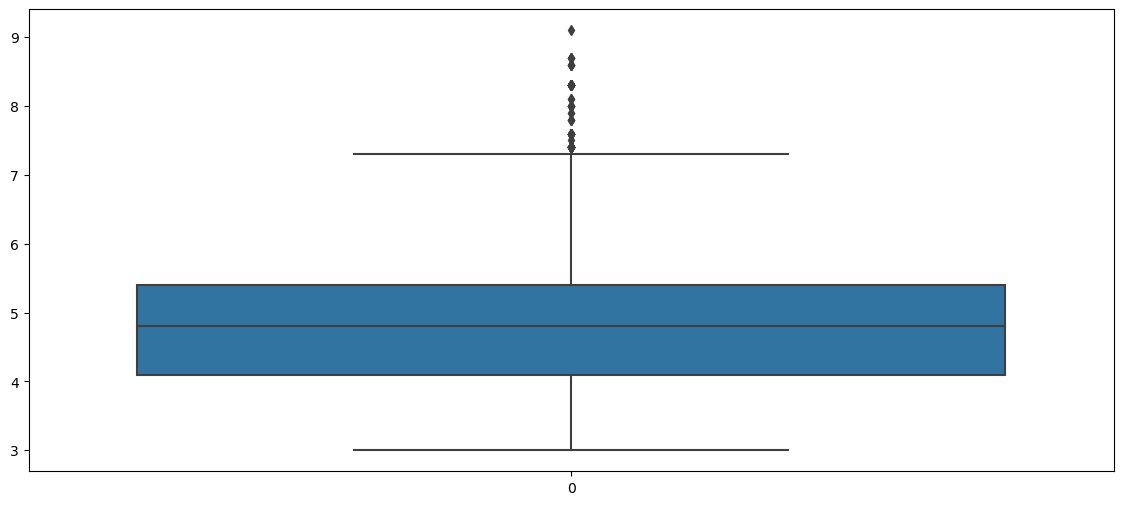

In [88]:
#SEeing teh boxplot of cons_comb
sns.boxplot(df['cons_comb'])
plt.show()
#As we can see, there are some outliers in cons_comb

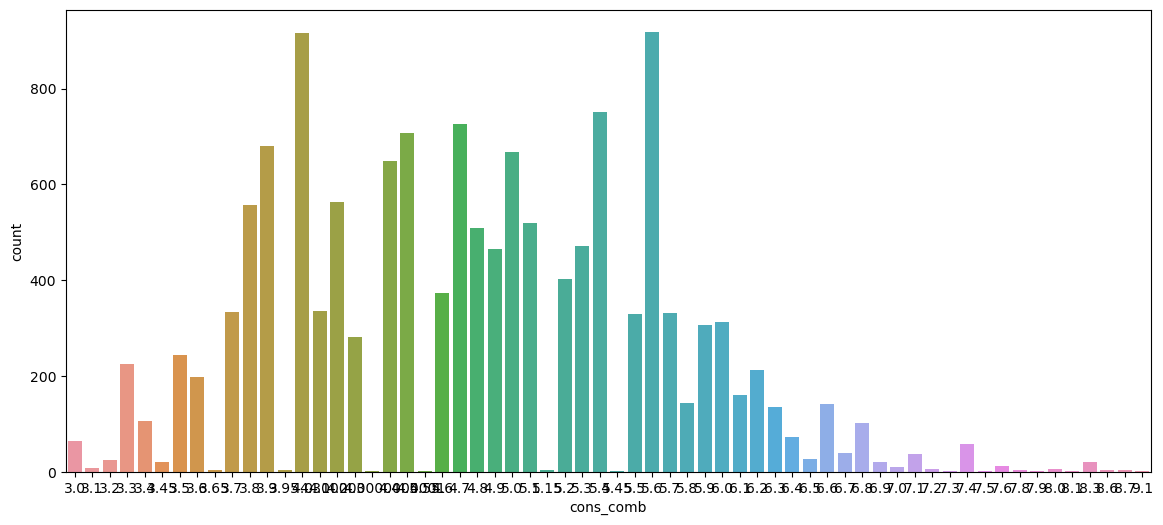

In [89]:
#Seeing the countplot of cons_comb
sns.countplot(x=df["cons_comb"])
plt.show()

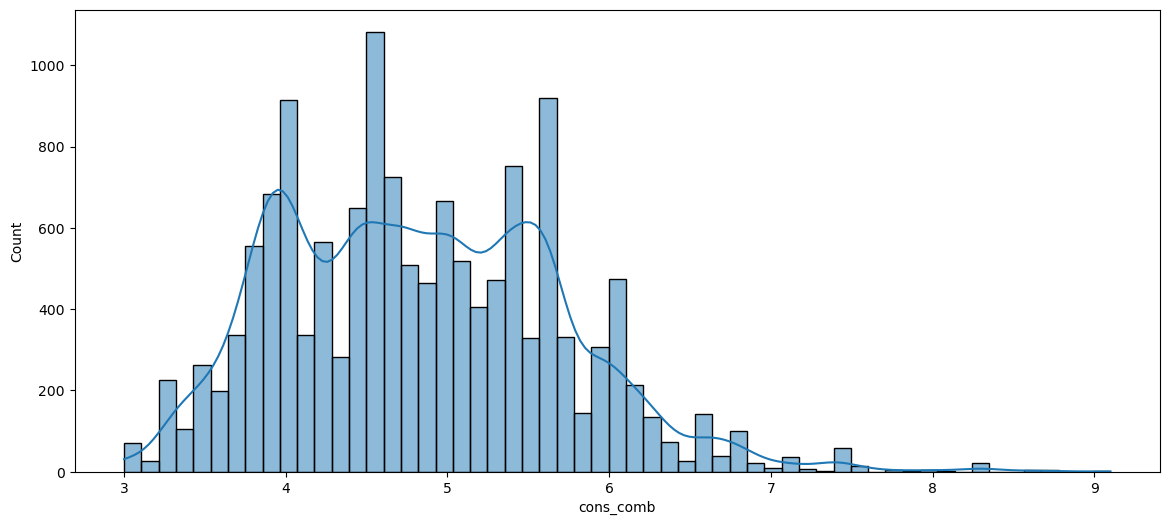

In [90]:
#Seeing the histplot of cons_comb
sns.histplot(df["cons_comb"], kde=True)
plt.show()

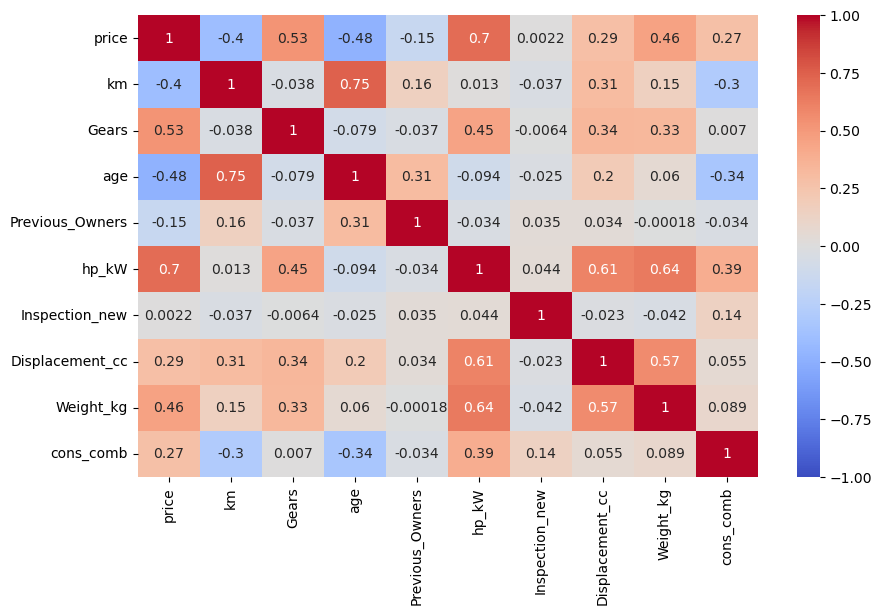

In [93]:
#Seeing the correlation 
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot =True, cmap="coolwarm");
#As we can see, there is not correlation here

In [95]:
#Seeing the multicollinearity
df.corr(numeric_only=True)[(abs(df.corr(numeric_only=True))>= 0.9) & (abs(df.corr(numeric_only=True)) < 1)].any().any()
#As we can see, we do not have multicollinearity

False

## Feature Engineering

In [96]:
#Seeing the head of the data 
df.head()
#Well, from the EDA, i can not see vat as a important feature, so i am going to drop it. The reason for this is that 
#this may affect our target which is the price, so in my opinio, dropping it is better

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [97]:
#Dropping vat from the dataset
df.drop(columns=["vat"], inplace=True)

In [98]:
#Seeing the head of the dataset after dropping vat
df.head()
#As we can see, we do not have vat column now

,make_model,body_type,price,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [99]:
#Seeing the object columns in the dataset and assignt it to a variable
df_ob = df.select_dtypes(include ="object").head()
df_ob
#As we can see, there are a lot of object columns in the dataset

,make_model,body_type,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Metallic,Cloth,Automatic,front


### Comfort_Convenience

In [124]:
#Seeing Comfort_Convenience 
df.Comfort_Convenience.sample(5)
#As we can see, we do have many things in it, and the best way is separite them from the comma, as there is different thing
#after each comma

8066     Air conditioning,Electrical side mirrors,Light...
12632    Air conditioning,Electrical side mirrors,Keyle...
11708    Air conditioning,Armrest,Automatic climate con...
854      Air conditioning,Electrical side mirrors,Leath...
13955                       Air conditioning,Power windows
Name: Comfort_Convenience, dtype: object

In [125]:
#Converting Comfort_Convenience from object to numeric
df["Comfort_Convenience"] = df.Comfort_Convenience.apply(lambda x: len(x.split(',')))

In [126]:
#Seeing Comfort_Convenience after converting
df["Comfort_Convenience"]
#As we can see, now it is numeric not object

0        16
1         9
2        13
3        16
4        13
         ..
14216    27
14217    20
14218    26
14219    23
14220    24
Name: Comfort_Convenience, Length: 14221, dtype: int64

### Entertainment_Media

In [105]:
#Seeing Entertainment_Media 
df.Entertainment_Media.sample(5)
#As we can see, we do have many things in it, and the best way is separite them from the comma, as there is different thing
#after each comma

7373     Bluetooth,Hands-free equipment,On-board comput...
963      Bluetooth,CD player,Digital radio,Hands-free e...
7498              Bluetooth,Hands-free equipment,Radio,USB
68       Bluetooth,CD player,MP3,On-board computer,Radi...
11962            Bluetooth,MP3,On-board computer,Radio,USB
Name: Entertainment_Media, dtype: object

In [122]:
#Converting Entertainment_Media from object to numeric
df["Entertainment_Media"] = df.Entertainment_Media.apply(lambda x: len(x.split(',')))

In [123]:
#Seeing Entertainment_Media after converting
df["Entertainment_Media"]
#As we can see, now it is numeric not object

0        4
1        5
2        2
3        8
4        7
        ..
14216    7
14217    6
14218    7
14219    5
14220    4
Name: Entertainment_Media, Length: 14221, dtype: int64

### Extras

In [106]:
#Seeing Extras 
df.Extras.sample(5)
#As we can see, we do have many things in it, and the best way is separite them from the comma, as there is different thing
#after each comma

4281    Alloy wheels,Sport package,Sport seats,Sport s...
494                              Alloy wheels,Sport seats
2610                                         Alloy wheels
1821                                         Alloy wheels
8316                                         Alloy wheels
Name: Extras, dtype: object

In [119]:
#Converting Extras from object to numeric
df["Extras"] = df.Extras.apply(lambda x: len(x.split(',')))

In [120]:
#Seeing Extras after converting
df["Extras"]
#As we can see, now it is numeric not object

0        3
1        4
2        2
3        3
4        4
        ..
14216    3
14217    2
14218    5
14219    3
14220    1
Name: Extras, Length: 14221, dtype: int64

### Safety_Security

In [107]:
#Seeing Safety_Security 
df.Safety_Security.sample(5)
#As we can see, we do have many things in it, and the best way is separite them from the comma, as there is different thing
#after each comma

7771     ABS,Central door lock,Daytime running lights,D...
13387    ABS,LED Headlights,Tire pressure monitoring sy...
13130    ABS,Central door lock,Daytime running lights,D...
2497     ABS,Central door lock,Driver-side airbag,Elect...
12935    ABS,Central door lock,Daytime running lights,D...
Name: Safety_Security, dtype: object

In [116]:
#Converting Safety_Security from object to numeric
df["Safety_Security"] = df.Safety_Security.apply(lambda x: len(x.split(',')))

In [117]:
#Seeing Safety_Security after converting
df["Safety_Security "]
#As we can see, now it is numeric not object

0        14
1        15
2        12
3        14
4        13
         ..
14216    18
14217    19
14218    19
14219    19
14220    18
Name: Safety_Security , Length: 14221, dtype: int64

In [127]:
#Let's the dataset after converting
df.head()
#As we can see, they have converted successfuly

,make_model,body_type,price,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security
0,Audi A1,Sedans,15770,56013.000,Used,Diesel,7.000,16,4,3,14,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800,16,4,3,14
1,Audi A1,Sedans,14500,80000.000,Used,Benzine,7.000,9,5,4,15,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600,9,5,4,15
2,Audi A1,Sedans,14640,83450.000,Used,Diesel,7.000,13,2,2,12,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800,13,2,2,12
3,Audi A1,Sedans,14500,73000.000,Used,Diesel,6.000,16,8,3,14,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800,16,8,3,14
4,Audi A1,Sedans,16790,16200.000,Used,Diesel,7.000,13,7,4,13,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100,13,7,4,13


In [129]:
#Seeing the object columns in the dataset and assignt it to a variable
df_ob2 = df.select_dtypes(include ="object").head()
df_ob2
#As we can see, now we can see that the numbers are decreased after converting

,make_model,body_type,Type,Fuel,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,Used,Diesel,Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Used,Benzine,Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,Used,Diesel,Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,Used,Diesel,Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,Used,Diesel,Metallic,Cloth,Automatic,front


### Train | Test Split

In [ ]:
#Splitting the data to X and y
X= df.drop(columns="price")
y= df.price

In [ ]:
#Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t, random_state=s)

In [ ]:
#Seeing the object classes in the data set
df.select_dtypes(include="object").head(1)